**Student Name :-**
1. Mohit Patil      
Email_ID - mohitz4418@gmail.com


## Case Study : Telecom Churn

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. 

Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Step 1 : Import necessary libraries and warnings.

In [1]:
# Importing all necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from collections import OrderedDict
from itertools import islice

In [2]:
# Filtering out the warnings.

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Step 2 : Reading and Understanding the dataset.

In [4]:
# Reading the "telecom_churn_data.csv" dataset.

Telecom_Data = pd.read_csv("telecom_churn_data.csv")

In [5]:
# Displaying top 5 records from "telecom_churn_data.csv" dataset. 

Telecom_Data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [6]:
# Displaying last 5 records from "telecom_churn_data.csv" dataset.

Telecom_Data.tail()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
99994         15.19         54.46         52.79         27.14            0.0   
99995        100.83         69.01         66.39         56.13            0.0   
99996         21.04           NaN           NaN           NaN            0.0   
99997          0.00          0.00          0.00          0.00            0.0   
99998        166.46           NaN           NaN           NaN            0.0   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
99994            0.0            0.0           0.00            0.0   
99995            0.0            0.0           0.95            0.0   
99996            NaN            NaN            NaN            0.0   
99997            0.0            0.0           0.00            0.0   
99998            NaN            NaN            NaN            0.0   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
99994            0.0            0.0           0.00              5.40   
99995            0.0            0.0           4.23             28.93   
99996            NaN            NaN            NaN              1.11   
99997            0.0            0.0           0.00              0.00   
99998            NaN            NaN            NaN             84.34   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
99994              3.36              5.91              0.00             12.78   
99995             18.13             16.06             49.49             91.34   
99996               NaN               NaN               NaN             13.33   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN            166.46   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
99994             54.46             49.58             24.78              0.00   
99995             47.53             57.51             46.71              1.71   
99996               NaN               NaN               NaN              0.00   
99997              0.00              0.00              0.00              0.00   
99998               NaN               NaN               NaN              0.00   

       l

In [7]:
# Determining the shape of dataset.

Telecom_Data.shape

(99999, 226)

In [8]:
# Describe the data.

Telecom_Data.describe(include = "all")

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

In [9]:
# Understanding the data.

Telecom_Data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

## Step 3 : Data Cleaning.

### 3.1. Drop columns that are having high percentage of missing values. Check all the columns before dropping   them and then impute values in columns which are important.

In [10]:
# Define a function for getting missing values.

def getMissingValues(missingCutoff):
    missing = round(100*(Telecom_Data.isnull().sum()/Telecom_Data.shape[0]))
    print("There are {} features having more than {}% missing values".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [11]:
# Define a function for imputting the data.

def imputeNan(data, imputeColList = False, missingColList = False):
    if imputeColList:
        for col in [y + s for s in ['_6','_7','_8','_9'] for y in imputeColList]:
            data[col].fillna(0, inplace=True)
    else:    
        for col in missingColList:
            data[col].fillna(0, inplace=True)

In [12]:
# Check for missing values in dataframe.

getMissingValues(50)

There are 40 features having more than 50% missing values


date_of_last_rech_data_6    75.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_6           75.0
total_rech_data_7           74.0
total_rech_data_8           74.0
total_rech_data_9           74.0
max_rech_data_6             75.0
max_rech_data_7             74.0
max_rech_data_8             74.0
max_rech_data_9             74.0
count_rech_2g_6             75.0
count_rech_2g_7             74.0
count_rech_2g_8             74.0
count_rech_2g_9             74.0
count_rech_3g_6             75.0
count_rech_3g_7             74.0
count_rech_3g_8             74.0
count_rech_3g_9             74.0
av_rech_amt_data_6          75.0
av_rech_amt_data_7          74.0
av_rech_amt_data_8          74.0
av_rech_amt_data_9          74.0
arpu_3g_6                   75.0
arpu_3g_7                   74.0
arpu_3g_8                   74.0
arpu_3g_9                   74.0
arpu_2g_6                   75.0
arpu_2g_7                   74.0
arpu_2g_8 

- From all these features some are important for analysis so, we will keep them and replace its missing values to 0.

In [13]:
# Impute missing values in important features since this columns are useful for getting high value customers.

Col = ["av_rech_amt_data", "arpu_2g", "arpu_3g", "count_rech_2g", "count_rech_3g", "max_rech_data", "total_rech_data", 
       "fb_user", "night_pck_user"]
imputeNan(Telecom_Data, Col)

In [14]:
# Check again for missing values after performing imputation.

Drop_Col = list(getMissingValues(50).index)
Drop_Col

There are 4 features having more than 50% missing values


['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

- Lets drop these columns which have more than 50% of missing values.

In [15]:
# Dropping columns which have more than 50% of missing values.

Telecom_Data.drop(Drop_Col, axis = 1, inplace = True)

In [16]:
# Check for missing values after dropping columns.

getMissingValues(50)

There are 0 features having more than 50% missing values


Series([], dtype: float64)

In [17]:
# Check the shape of data after dropping columns.

Telecom_Data.shape

(99999, 222)

In [18]:
# Check missing values in other column for less percentage of missing data.

getMissingValues(5)

There are 29 features having more than 5% missing values


onnet_mou_9         8.0
offnet_mou_9        8.0
roam_ic_mou_9       8.0
roam_og_mou_9       8.0
loc_og_t2t_mou_9    8.0
loc_og_t2m_mou_9    8.0
loc_og_t2f_mou_9    8.0
loc_og_t2c_mou_9    8.0
loc_og_mou_9        8.0
std_og_t2t_mou_9    8.0
std_og_t2m_mou_9    8.0
std_og_t2f_mou_9    8.0
std_og_t2c_mou_9    8.0
std_og_mou_9        8.0
isd_og_mou_9        8.0
spl_og_mou_9        8.0
og_others_9         8.0
loc_ic_t2t_mou_9    8.0
loc_ic_t2m_mou_9    8.0
loc_ic_t2f_mou_9    8.0
loc_ic_mou_9        8.0
std_ic_t2t_mou_9    8.0
std_ic_t2m_mou_9    8.0
std_ic_t2f_mou_9    8.0
std_ic_t2o_mou_9    8.0
std_ic_mou_9        8.0
spl_ic_mou_9        8.0
isd_ic_mou_9        8.0
ic_others_9         8.0
dtype: float64

- Here all these columns have same percentage of missing values and it seems like these column has missing value for 9th month.

In [19]:
# Checking if all these above features go missing together since they have the same 8% missing values in each feature.

missingcol = list(getMissingValues(5).index)
Telecom_Data[Telecom_Data[missingcol].isnull().all(axis = 1)][missingcol]

There are 29 features having more than 5% missing values


onnet_mou_9  offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  \
0              NaN           NaN            NaN            NaN   
7              NaN           NaN            NaN            NaN   
29             NaN           NaN            NaN            NaN   
32             NaN           NaN            NaN            NaN   
35             NaN           NaN            NaN            NaN   
...            ...           ...            ...            ...   
99978          NaN           NaN            NaN            NaN   
99983          NaN           NaN            NaN            NaN   
99993          NaN           NaN            NaN            NaN   
99996          NaN           NaN            NaN            NaN   
99998          NaN           NaN            NaN            NaN   

       loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  \
0                   NaN               NaN               NaN               NaN   
7                   NaN               NaN               NaN               NaN   
29                  NaN               NaN               NaN               NaN   
32                  NaN               NaN               NaN               NaN   
35                  NaN               NaN               NaN               NaN   
...                 ...               ...               ...               ...   
99978               NaN               NaN               NaN               NaN   
99983               NaN               NaN               NaN               NaN   
99993               NaN               NaN               NaN               NaN   
99996               NaN               NaN               NaN               NaN   
99998               NaN               NaN               NaN               NaN   

       loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  \
0               NaN               NaN               NaN               NaN   
7               NaN               NaN               NaN               NaN   
29              NaN               NaN               NaN               NaN   
32              NaN               NaN               NaN               NaN   
35              NaN               NaN               NaN               NaN   
...             ...               ...               ...               ...   
99978           NaN               NaN               NaN               NaN   
99983           NaN               NaN               NaN               NaN   
99993           NaN               NaN               NaN               NaN   
99996           NaN               NaN               NaN               NaN   
99998           NaN               NaN               NaN               NaN   

       std_og_t2c_mou_9  std_og_mou_9  isd_og_mou_9  spl_og_mou_9  \
0                   NaN           NaN           NaN           NaN   
7                   NaN           NaN           NaN           NaN   
29                  NaN           NaN           NaN           NaN   
32                  NaN           NaN           NaN           NaN   
35                  NaN           NaN           NaN           NaN   
...                 ...           ...           ...           ...   
99978               NaN           NaN           NaN           NaN   
99983               NaN           NaN           NaN           NaN   
99993               NaN           NaN           NaN           NaN   
99996               NaN           NaN           NaN           NaN   
99998               NaN           NaN           NaN           NaN   

       og_others_9  loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  \
0              NaN               NaN               NaN               NaN   
7              NaN               NaN               NaN               NaN   
29             NaN               NaN               NaN               NaN   
32             NaN               NaN               NaN               NaN   
35             NaN               NaN               NaN               NaN   
...            ...             

- From above code we observe that for 7745 customers all the above columns are without any value.
- So we will impute 0 in this missing places.

In [20]:
# Imputing the value in missing place.

imputeNan(Telecom_Data, missingColList = missingcol)

In [21]:
# Check the shape of dataset after imputation.

Telecom_Data.shape

(99999, 222)

In [22]:
# Again check for missing value in dataframe for more than 2 percentage of missing data.

getMissingValues(2)

There are 89 features having more than 2% missing values


onnet_mou_6            4.0
onnet_mou_7            4.0
onnet_mou_8            5.0
offnet_mou_6           4.0
offnet_mou_7           4.0
offnet_mou_8           5.0
roam_ic_mou_6          4.0
roam_ic_mou_7          4.0
roam_ic_mou_8          5.0
roam_og_mou_6          4.0
roam_og_mou_7          4.0
roam_og_mou_8          5.0
loc_og_t2t_mou_6       4.0
loc_og_t2t_mou_7       4.0
loc_og_t2t_mou_8       5.0
loc_og_t2m_mou_6       4.0
loc_og_t2m_mou_7       4.0
loc_og_t2m_mou_8       5.0
loc_og_t2f_mou_6       4.0
loc_og_t2f_mou_7       4.0
loc_og_t2f_mou_8       5.0
loc_og_t2c_mou_6       4.0
loc_og_t2c_mou_7       4.0
loc_og_t2c_mou_8       5.0
loc_og_mou_6           4.0
loc_og_mou_7           4.0
loc_og_mou_8           5.0
std_og_t2t_mou_6       4.0
std_og_t2t_mou_7       4.0
std_og_t2t_mou_8       5.0
std_og_t2m_mou_6       4.0
std_og_t2m_mou_7       4.0
std_og_t2m_mou_8       5.0
std_og_t2f_mou_6       4.0
std_og_t2f_mou_7       4.0
std_og_t2f_mou_8       5.0
std_og_t2c_mou_6       4.0
s

In [23]:
# Get the columns which have more than 2 percent of missing values.

missingcol = list(getMissingValues(2).index)
Telecom_Data[Telecom_Data[missingcol].isnull().all(axis = 1)][missingcol]

There are 89 features having more than 2% missing values


onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
202            NaN          NaN          NaN           NaN           NaN   
275            NaN          NaN          NaN           NaN           NaN   
687            NaN          NaN          NaN           NaN           NaN   
1206           NaN          NaN          NaN           NaN           NaN   
1232           NaN          NaN          NaN           NaN           NaN   
...            ...          ...          ...           ...           ...   
96810          NaN          NaN          NaN           NaN           NaN   
96966          NaN          NaN          NaN           NaN           NaN   
97539          NaN          NaN          NaN           NaN           NaN   
97762          NaN          NaN          NaN           NaN           NaN   
97810          NaN          NaN          NaN           NaN           NaN   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
202             NaN            NaN            NaN            NaN   
275             NaN            NaN            NaN            NaN   
687             NaN            NaN            NaN            NaN   
1206            NaN            NaN            NaN            NaN   
1232            NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...   
96810           NaN            NaN            NaN            NaN   
96966           NaN            NaN            NaN            NaN   
97539           NaN            NaN            NaN            NaN   
97762           NaN            NaN            NaN            NaN   
97810           NaN            NaN            NaN            NaN   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
202              NaN            NaN            NaN               NaN   
275              NaN            NaN            NaN               NaN   
687              NaN            NaN            NaN               NaN   
1206             NaN            NaN            NaN               NaN   
1232             NaN            NaN            NaN               NaN   
...              ...            ...            ...               ...   
96810            NaN            NaN            NaN               NaN   
96966            NaN            NaN            NaN               NaN   
97539            NaN            NaN            NaN               NaN   
97762            NaN            NaN            NaN               NaN   
97810            NaN            NaN            NaN               NaN   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
202                 NaN               NaN               NaN               NaN   
275                 NaN               NaN               NaN               NaN   
687                 NaN               NaN               NaN               NaN   
1206                NaN               NaN               NaN               NaN   
1232                NaN               NaN               NaN               NaN   
...                 ...               ...               ...               ...   
96810               NaN               NaN               NaN               NaN   
96966               NaN               NaN               NaN               NaN   
97539               NaN               NaN               NaN               NaN   
97762               NaN               NaN               NaN               NaN   
97810               NaN               NaN               NaN               NaN   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
202                 NaN               NaN               NaN               NaN   
275                 NaN               NaN               NaN               NaN   
687                 NaN               NaN               NaN               NaN   
1206                NaN               NaN               NaN               NaN   
1232                NaN           

- From above code snippet we observe that these 381 customers has missing values for all above columns.
- So instead of imputing them we drop it.

In [24]:
# Dropping those customers whi have all fields missing.

Telecom_Data = Telecom_Data[~Telecom_Data[missingcol].isnull().all(axis = 1)]
Telecom_Data.shape

(99618, 222)

In [25]:
# For other customers where these missing values are spread out, let's impute them with zero. 

missingcol.remove("date_of_last_rech_8")
missingcol.remove("date_of_last_rech_9")

imputeNan(Telecom_Data, missingColList = missingcol)

### 3.2. Imputation for categorical features.

In [26]:
# Again check for missing value in dataframe for more than 0 percentage of missing data.

getMissingValues(0)

There are 9 features having more than 0% missing values


loc_og_t2o_mou          1.0
std_og_t2o_mou          1.0
loc_ic_t2o_mou          1.0
last_date_of_month_8    1.0
last_date_of_month_9    1.0
date_of_last_rech_6     1.0
date_of_last_rech_7     1.0
date_of_last_rech_8     3.0
date_of_last_rech_9     4.0
dtype: float64

In [27]:
# Check the unique values in each column which has very less missing values.

Telecom_Data[["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "last_date_of_month_8", "last_date_of_month_9", 
              "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", "date_of_last_rech_9"]].nunique()

loc_og_t2o_mou           1
std_og_t2o_mou           1
loc_ic_t2o_mou           1
last_date_of_month_8     1
last_date_of_month_9     1
date_of_last_rech_6     30
date_of_last_rech_7     31
date_of_last_rech_8     31
date_of_last_rech_9     30
dtype: int64

In [28]:
# Use mode for imputing value in this columns.

Col = ["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "last_date_of_month_8", "last_date_of_month_9", 
       "last_date_of_month_7", "date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", "date_of_last_rech_9"]

for Column in Col:
    Telecom_Data[Column].fillna(Telecom_Data[Column].mode()[0], inplace = True)

In [29]:
Telecom_Data.isnull().sum()

mobile_number           0
circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
last_date_of_month_9    0
arpu_6                  0
arpu_7                  0
arpu_8                  0
arpu_9                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
onnet_mou_9             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
offnet_mou_9            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_ic_mou_9           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
roam_og_mou_9           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2t_mou_9        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2m_mou_9        0
loc_og_t2f_mou_6        0
loc_og_t2f_m

### 3.3. Drop categorical columns that are highly skewed or Contains single value.

In [30]:
# Check the columns which ara highly skewed by observing the unique value counts in rach column.

for column in Telecom_Data:
    print(Telecom_Data[column].astype('category').value_counts(normalize = True) * 100)
    print("============================================================================================================")

7002410905    0.001004
7000808487    0.001004
7000808172    0.001004
7000808173    0.001004
7000808199    0.001004
                ...   
7001610513    0.001004
7001610565    0.001004
7001610567    0.001004
7001610580    0.001004
7000000074    0.001004
Name: mobile_number, Length: 99618, dtype: float64
109    100.0
Name: circle_id, dtype: float64
0.0    100.0
Name: loc_og_t2o_mou, dtype: float64
0.0    100.0
Name: std_og_t2o_mou, dtype: float64
0.0    100.0
Name: loc_ic_t2o_mou, dtype: float64
6/30/2014    100.0
Name: last_date_of_month_6, dtype: float64
7/31/2014    100.0
Name: last_date_of_month_7, dtype: float64
8/31/2014    100.0
Name: last_date_of_month_8, dtype: float64
9/30/2014    100.0
Name: last_date_of_month_9, dtype: float64
 0.000       3.734265
 20.000      0.098376
-5.000       0.096368
 1.000       0.067257
 1.500       0.060230
               ...   
 328.760     0.001004
 328.767     0.001004
 328.770     0.001004
 328.783     0.001004
-2258.709    0.001004
Name: arpu_

0.00      85.147263
1.01       0.037142
0.43       0.030115
0.01       0.026100
0.91       0.026100
            ...    
103.49     0.001004
103.58     0.001004
103.61     0.001004
103.69     0.001004
58.71      0.001004
Name: roam_og_mou_7, Length: 6639, dtype: float64
0.00      85.596980
0.03       0.033127
0.43       0.028107
0.23       0.028107
0.18       0.027104
            ...    
104.16     0.001004
104.19     0.001004
104.29     0.001004
104.36     0.001004
58.76      0.001004
Name: roam_og_mou_8, Length: 6504, dtype: float64
0.00     87.055552
0.21      0.047180
1.01      0.035134
0.43      0.032123
0.26      0.028107
           ...    
93.01     0.001004
93.09     0.001004
93.34     0.001004
93.48     0.001004
53.58     0.001004
Name: roam_og_mou_9, Length: 5882, dtype: float64
0.00       19.624967
0.33        0.133510
0.48        0.119456
0.31        0.105403
0.26        0.105403
             ...    
70.79       0.001004
184.11      0.001004
183.98      0.001004
183.94      

Name: std_og_t2t_mou_6, Length: 18244, dtype: float64
0.00       56.227790
0.36        0.063242
0.33        0.063242
0.31        0.062238
1.01        0.060230
             ...    
162.99      0.001004
414.33      0.001004
162.93      0.001004
162.86      0.001004
8133.66     0.001004
Name: std_og_t2t_mou_7, Length: 18567, dtype: float64
0.00      57.328997
0.31       0.074284
0.50       0.064245
0.45       0.061234
0.56       0.061234
            ...    
357.71     0.001004
357.68     0.001004
357.64     0.001004
357.61     0.001004
201.49     0.001004
Name: std_og_t2t_mou_8, Length: 18291, dtype: float64
0.00       59.568552
0.51        0.062238
0.48        0.060230
0.58        0.058222
0.38        0.057219
             ...    
420.68      0.001004
420.71      0.001004
158.99      0.001004
158.98      0.001004
9382.58     0.001004
Name: std_og_t2t_mou_9, Length: 17934, dtype: float64
0.00      40.505732
0.50       0.098376
0.46       0.092353
0.33       0.089341
0.35       0.089341
  

Name: total_og_mou_6, Length: 40327, dtype: float64
0.00      9.412957
0.21      0.048184
0.03      0.026100
0.20      0.024092
0.13      0.023088
            ...   
603.93    0.001004
603.98    0.001004
604.18    0.001004
604.19    0.001004
382.31    0.001004
Name: total_og_mou_7, Length: 40477, dtype: float64
0.00        11.009055
0.21         0.028107
0.23         0.027104
0.36         0.024092
0.40         0.023088
              ...    
618.86       0.001004
262.69       0.001004
262.71       0.001004
618.78       0.001004
14043.06     0.001004
Name: total_og_mou_8, Length: 40074, dtype: float64
0.00      13.814772
0.21       0.081311
0.20       0.049188
0.43       0.035134
1.01       0.033127
            ...    
591.54     0.001004
591.58     0.001004
591.59     0.001004
591.64     0.001004
372.29     0.001004
Name: total_og_mou_9, Length: 39160, dtype: float64
0.00      15.996105
0.38       0.104399
0.36       0.100383
0.33       0.100383
0.43       0.097372
            ...    
1

0.00      41.880985
0.03       0.212813
0.26       0.187717
0.33       0.185709
0.41       0.168644
            ...    
116.71     0.001004
116.73     0.001004
116.81     0.001004
116.86     0.001004
68.99      0.001004
Name: std_ic_t2m_mou_9, Length: 8933, dtype: float64
0.00     79.317995
0.31      0.179686
0.43      0.170652
0.33      0.169648
0.20      0.147564
           ...    
37.33     0.001004
37.30     0.001004
37.29     0.001004
37.28     0.001004
22.00     0.001004
Name: std_ic_t2f_mou_6, Length: 3125, dtype: float64
0.00     79.183481
0.33      0.178683
0.31      0.175671
0.48      0.174667
0.25      0.149571
           ...    
37.83     0.001004
37.76     0.001004
37.74     0.001004
37.71     0.001004
22.64     0.001004
Name: std_ic_t2f_mou_7, Length: 3209, dtype: float64
0.00     79.293903
0.33      0.175671
0.26      0.152583
0.36      0.142545
0.31      0.142545
           ...    
34.76     0.001004
34.74     0.001004
34.73     0.001004
34.71     0.001004
21.41     0.0

0.00     88.257142
0.25      1.530848
0.50      0.834187
0.21      0.735811
0.06      0.421611
0.08      0.368407
0.75      0.367403
0.11      0.341304
0.10      0.320223
0.13      0.308177
0.43      0.296131
0.23      0.295127
0.05      0.289104
0.18      0.247947
0.16      0.244936
0.31      0.243932
0.33      0.237909
0.01      0.212813
0.28      0.200767
0.26      0.187717
0.36      0.187717
0.46      0.163625
0.48      0.156598
0.20      0.153587
0.41      0.151579
0.15      0.148568
0.38      0.147564
0.03      0.144552
0.29      0.138529
0.24      0.137525
1.00      0.113433
0.19      0.113433
0.34      0.113433
0.56      0.107410
0.35      0.104399
0.40      0.103395
0.14      0.102391
0.44      0.091349
0.64      0.091349
0.58      0.091349
0.30      0.084322
0.49      0.084322
0.71      0.079303
0.51      0.077295
0.39      0.077295
0.61      0.077295
0.63      0.069265
0.66      0.067257
0.73      0.062238
0.54      0.059226
0.09      0.058222
0.53      0.058222
0.68      0.

Name: total_rech_data_7, dtype: float64
0.0     73.559999
1.0     13.364051
2.0      5.233994
3.0      2.209440
4.0      1.583047
5.0      1.028931
6.0      0.793029
7.0      0.507940
8.0      0.418599
9.0      0.294124
10.0     0.256982
11.0     0.187717
12.0     0.142545
14.0     0.084322
13.0     0.083318
15.0     0.053203
16.0     0.040153
17.0     0.029111
18.0     0.023088
19.0     0.014054
22.0     0.011042
23.0     0.011042
20.0     0.010038
24.0     0.007027
21.0     0.006023
26.0     0.005019
25.0     0.004015
28.0     0.004015
29.0     0.004015
30.0     0.004015
40.0     0.003012
32.0     0.003012
46.0     0.002008
44.0     0.002008
42.0     0.002008
34.0     0.002008
27.0     0.002008
38.0     0.001004
39.0     0.001004
37.0     0.001004
57.0     0.001004
33.0     0.001004
48.0     0.001004
49.0     0.001004
50.0     0.001004
55.0     0.001004
60.0     0.001004
Name: total_rech_data_8, dtype: float64
0.0     73.978598
1.0     12.934409
2.0      5.439780
3.0      2.517617
4.

Name: vol_3g_mb_7, Length: 14516, dtype: float64
0.00      84.040033
0.01       0.022084
0.03       0.014054
0.04       0.013050
0.13       0.010038
            ...    
891.29     0.001004
891.17     0.001004
891.01     0.001004
890.93     0.001004
585.99     0.001004
Name: vol_3g_mb_8, Length: 14960, dtype: float64
0.00      84.580096
0.01       0.018069
0.04       0.017065
0.02       0.016061
0.03       0.014054
            ...    
916.02     0.001004
915.98     0.001004
915.82     0.001004
915.74     0.001004
591.44     0.001004
Name: vol_3g_mb_9, Length: 14472, dtype: float64
 0.00      85.730490
 212.17     0.668554
 0.01       0.440683
 122.07     0.419603
 63.96      0.307173
             ...    
 221.66     0.001004
 221.73     0.001004
 221.74     0.001004
 221.76     0.001004
-30.82      0.001004
Name: arpu_3g_6, Length: 7415, dtype: float64
 0.00      85.551808
 212.17     0.748861
 0.01       0.654500
 122.07     0.344315
 63.96      0.286093
             ...    
 222.91   

Name: sachet_3g_9, dtype: float64
0.0    76.921841
1.0    23.078159
Name: fb_user_6, dtype: float64
0.0    76.676906
1.0    23.323094
Name: fb_user_7, dtype: float64
0.0    76.447028
1.0    23.552972
Name: fb_user_8, dtype: float64
0.0    77.596418
1.0    22.403582
Name: fb_user_9, dtype: float64
3651    1.311008
2372    0.652493
495     0.320223
494     0.300147
492     0.296131
          ...   
3459    0.001004
3431    0.001004
3430    0.001004
3402    0.001004
4337    0.001004
Name: aon, Length: 3489, dtype: float64
0.00      83.276115
0.17       0.011042
0.05       0.010038
0.07       0.009035
0.26       0.009035
            ...    
462.59     0.001004
462.56     0.001004
462.55     0.001004
462.41     0.001004
279.59     0.001004
Name: aug_vbc_3g, Length: 14656, dtype: float64
0.00      83.871389
0.02       0.010038
0.04       0.010038
0.03       0.009035
0.48       0.009035
            ...    
463.86     0.001004
463.78     0.001004
463.57     0.001004
463.41     0.001004
275.84 

In [31]:
# Remove all the columns which contain single value in columns and not important.

Single_Value_Columns = Telecom_Data[["circle_id", "loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "last_date_of_month_6",
                                    "last_date_of_month_7", "last_date_of_month_8", "last_date_of_month_9", "std_og_t2c_mou_6",
                                    "std_og_t2c_mou_7", "std_og_t2c_mou_8", "std_og_t2c_mou_9", "std_ic_t2o_mou_6", 
                                    "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9", "og_others_7", "og_others_8"]]

Telecom_Data.drop(Single_Value_Columns, axis = 1, inplace = True)

In [32]:
# Check the percentage of data after removing the missing values.

print("Percentage of data remaining after treating missing values: {}%".format(round(Telecom_Data.shape[0]/99999 *100,2)))

Percentage of data remaining after treating missing values: 99.62%


In [33]:
# Check the shape of dataframe after removing missing values and imputation.

Telecom_Data.shape

(99618, 204)

In [34]:
# Check the columns info.

Telecom_Data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99618 entries, 0 to 99998
Data columns (total 204 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mobile_number        int64  
 1   arpu_6               float64
 2   arpu_7               float64
 3   arpu_8               float64
 4   arpu_9               float64
 5   onnet_mou_6          float64
 6   onnet_mou_7          float64
 7   onnet_mou_8          float64
 8   onnet_mou_9          float64
 9   offnet_mou_6         float64
 10  offnet_mou_7         float64
 11  offnet_mou_8         float64
 12  offnet_mou_9         float64
 13  roam_ic_mou_6        float64
 14  roam_ic_mou_7        float64
 15  roam_ic_mou_8        float64
 16  roam_ic_mou_9        float64
 17  roam_og_mou_6        float64
 18  roam_og_mou_7        float64
 19  roam_og_mou_8        float64
 20  roam_og_mou_9        float64
 21  loc_og_t2t_mou_6     float64
 22  loc_og_t2t_mou_7     float64
 23  loc_og_t2t_mou_8     float64
 24  l

### 3.4. Fixing Data types.

In [35]:
# Fixing the datatype of columns.

Date_Columns = ["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8", "date_of_last_rech_9"]

for Columns in Date_Columns:
    Telecom_Data[Columns] = pd.to_datetime(Telecom_Data[Columns], format = "%m/%d/%Y")

In [36]:
# Check the fixing of datatypes.

Telecom_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99618 entries, 0 to 99998
Columns: 204 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](4), float64(166), int64(34)
memory usage: 155.8 MB


## Step 4 : Filter high value customers.

### 4.1. Calculate total data recharge amount.

In [37]:
# Calculate total recharge amount for June and July (Good Phase).
# We can calculate it by (Number of recharges * Average recharge amount).

Telecom_Data["total_data_rech_6"] = Telecom_Data.total_rech_data_6 * Telecom_Data.av_rech_amt_data_6
Telecom_Data["total_data_rech_7"] = Telecom_Data.total_rech_data_7 * Telecom_Data.av_rech_amt_data_7

### 4.2. Calculate total recharge amount.
Add total data recharge and total recharge to get total combined recharge amount for a month.

In [38]:
# Calculate the total recharge amount for June and July.
# We can calculate it by (call recharge amount + data recharge amount).

Telecom_Data["amt_data_6"] = Telecom_Data.total_rech_amt_6 + Telecom_Data.total_data_rech_6
Telecom_Data["amt_data_7"] = Telecom_Data.total_rech_amt_7 + Telecom_Data.total_data_rech_7

### 4.3. Calculate average recharge done by customer in June and July.

In [39]:
# Calculate the average recharge done by customers in month of June and July.

Telecom_Data["av_amt_data_6_7"] = (Telecom_Data.amt_data_6 + Telecom_Data.amt_data_7) / 2

### 4.4. Look at the 70th precentile recharge amount.

In [40]:
# Look at the 70th percentile recharge amount.

print("Recharge amount at 70th percentile is : {0}".format(Telecom_Data.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile is : 479.5


### 4.5. Retain only those customers who have recharged their mobiles with more than or equal to 70th precentile amount.

In [41]:
# Retain only those customers who have recharged their mobiles with more than or equal to 70th precentile amount.

Churn_Telecom_Data = Telecom_Data.loc[Telecom_Data.av_amt_data_6_7 >= Telecom_Data.av_amt_data_6_7.quantile(0.7), :]
Churn_Telecom_Data = Churn_Telecom_Data.reset_index(drop = True)
Churn_Telecom_Data.shape

(29906, 209)

In [42]:
# Delete the columns created to filter the High Value Customers.

Churn_Telecom_Data = Churn_Telecom_Data.drop(["total_data_rech_6", "total_data_rech_7", "amt_data_6", "amt_data_7",
                                             "av_amt_data_6_7"], axis = 1)
Churn_Telecom_Data.shape

(29906, 204)

## Step 5 : Derive churn 
9th month is our churn phase, Usage based churn

### 5.1. Calculate total incoming and outgoing minutes of usage.

In [43]:
# Calculate the total incoming and outgoing minutes of usage.
# We can calculate it by (total_ic_mou_9 + total_og_mou_9).

Churn_Telecom_Data["total_calls_mou_9"] = Churn_Telecom_Data.total_ic_mou_9 + Churn_Telecom_Data.total_og_mou_9
Churn_Telecom_Data[["total_ic_mou_9", "total_og_mou_9" ,"total_calls_mou_9"]].head()

total_ic_mou_9  total_og_mou_9  total_calls_mou_9
0            0.00            0.00               0.00
1            0.00            0.00               0.00
2           34.91          142.18             177.09
3          252.61         1031.53            1284.14
4          127.48          127.63             255.11

### 5.2. Calculate 2g and 3g data consumption.

In [44]:
# Calculate 2g and 3g data consumption.
# We can calculate is by (vol_2g_mb_9 + vol_3g_mb_9).

Churn_Telecom_Data["total_internet_mb_9"] = Churn_Telecom_Data.vol_2g_mb_9 + Churn_Telecom_Data.vol_3g_mb_9
Churn_Telecom_Data[["vol_2g_mb_9", "vol_3g_mb_9", "total_internet_mb_9"]].head()

vol_2g_mb_9  vol_3g_mb_9  total_internet_mb_9
0         0.00         0.00                 0.00
1         0.00         0.00                 0.00
2         0.00         0.00                 0.00
3         0.00         0.00                 0.00
4        13.93       314.74               328.67

### 5.3. Create churn variable : those who have not used either calls or internet in the month of september are  customers who have churned.

In [45]:
# Create churn variable : 
# those who have not used either calls or internet in the month of september are customers who have churned.

Churn_Telecom_Data["Churn"] = Churn_Telecom_Data.apply(lambda row : 1 if (row.total_calls_mou_9 == 0 and
                                                                         row.total_internet_mb_9 == 0) else 0, axis = 1)
# Here 0 = not churn and 1 = Churn

In [46]:
# Check the Churn Column.

Churn_Telecom_Data[["total_calls_mou_9", "total_internet_mb_9", "Churn"]].head()

total_calls_mou_9  total_internet_mb_9  Churn
0               0.00                 0.00      1
1               0.00                 0.00      1
2             177.09                 0.00      0
3            1284.14                 0.00      0
4             255.11               328.67      0

### 5.4. Check churn percentage.

In [47]:
# Change the data type of churn column as category.

Churn_Telecom_Data.Churn = Churn_Telecom_Data.Churn.astype("category")

In [48]:
# Remove the derived columns.

#Churn_Telecom_Data = Churn_Telecom_Data.drop(["total_calls_mou_9", "total_internet_mb_9"], axis = 1)

In [49]:
# Get the Churn percentage.

print("Churn Percentage : ")
print(Churn_Telecom_Data.Churn.value_counts() * 100 / Churn_Telecom_Data.shape[0])

Churn Percentage : 
0    91.914666
1     8.085334
Name: Churn, dtype: float64


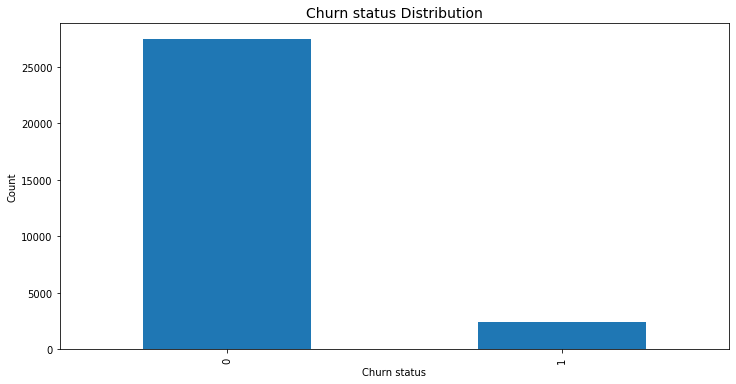

In [50]:
# Plot for Churn percentage.

plt.figure(figsize=(12,6))
Churn_Telecom_Data["Churn"].value_counts().plot(kind = "bar")
plt.ylabel("Count")
plt.xlabel("Churn status")
plt.title('Churn status Distribution', fontsize = 14)
plt.show()

### 5.5 . Delete all columns that belongs to churn month (9th month). 

In [51]:
# Delete all the columns belongs to 9th month.

Churn_Telecom_Data = Churn_Telecom_Data.filter(regex = "[^9]$", axis = 1)
Churn_Telecom_Data.shape

(29906, 155)

## Step 6 : Data Preperation and EDA.

### 6.1. Derive new variables.

In [52]:
#Create Derived categorical variable
Churn_Telecom_Data["aon_bin"] = pd.cut(Telecom_Data["aon"], range(0,Telecom_Data["aon"].max(),365), 
                             labels = range(0, int(round(Telecom_Data["aon"].max()/365))-1))

# Derive new feature for average revenue per user for month 8 and month 6, 7
Churn_Telecom_Data["arpu_diff"] = Churn_Telecom_Data.arpu_8 - ((Churn_Telecom_Data.arpu_6 + Churn_Telecom_Data.arpu_7) / 2)

# New feture for all kinds of calls within the same operator network.
Churn_Telecom_Data["onnet_mou_diff"] = Churn_Telecom_Data.onnet_mou_8 - ((Churn_Telecom_Data.onnet_mou_6 + Churn_Telecom_Data.onnet_mou_7) / 2)

# New feature for all kinds of calls outside the operator network.
Churn_Telecom_Data["offnet_mou_diff"] = Churn_Telecom_Data.offnet_mou_8 - ((Churn_Telecom_Data.offnet_mou_6 + Churn_Telecom_Data.offnet_mou_7) / 2)

# New feature for Incoming call in roaming zone.
Churn_Telecom_Data["roam_ic_mou_diff"] = Churn_Telecom_Data.roam_ic_mou_8 - ((Churn_Telecom_Data.roam_ic_mou_6 + Churn_Telecom_Data.roam_ic_mou_7) / 2)

# New feature for Outgoing call in roaming zone.
Churn_Telecom_Data["roam_og_mou_diff"] = Churn_Telecom_Data.roam_og_mou_8 - ((Churn_Telecom_Data.roam_og_mou_6 + Churn_Telecom_Data.roam_og_mou_7) / 2)

# New feature for maximum recharge amount difference.
Churn_Telecom_Data["max_rech_amt_diff"] = Churn_Telecom_Data.max_rech_amt_8 - ((Churn_Telecom_Data.max_rech_amt_6 + Churn_Telecom_Data.max_rech_amt_7) / 2)

# New feature for difference between total recharge for data.
Churn_Telecom_Data["total_rech_data_diff"] = Churn_Telecom_Data.total_rech_data_8 - ((Churn_Telecom_Data.total_rech_data_6 + Churn_Telecom_Data.total_rech_data_7) / 2)

# New feature for difference of maximum recharge for data.
Churn_Telecom_Data["max_rech_data_diff"] = Churn_Telecom_Data.max_rech_data_8 - ((Churn_Telecom_Data.max_rech_data_6 + Churn_Telecom_Data.max_rech_data_7) / 2)

# New feature for difference of average recharge amount used for data recharge.
Churn_Telecom_Data["av_rech_amt_data_diff"] = Churn_Telecom_Data.av_rech_amt_data_8 - ((Churn_Telecom_Data.av_rech_amt_data_6 + Churn_Telecom_Data.av_rech_amt_data_7) / 2)

# New feature for difference of average volume of 2g data used.
Churn_Telecom_Data["vol_2g_mb_diff"] = Churn_Telecom_Data.vol_2g_mb_8 - ((Churn_Telecom_Data.vol_2g_mb_6 + Churn_Telecom_Data.vol_2g_mb_7) / 2)

# New feature for differnce of average volume if 3g data used.
Churn_Telecom_Data["vol_3g_mb_diff"] = Churn_Telecom_Data.vol_3g_mb_8 - ((Churn_Telecom_Data.vol_3g_mb_6 + Churn_Telecom_Data.vol_3g_mb_7) / 2)

In [53]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8. These features will hold the 
# ratio (= total_og_mou_* / total_ic_mou_) for each month. These features will combine both incoming and outgoing 
# informations and should be a better predictor of churn.

for i in range(6,9):
    Churn_Telecom_Data["og_to_ic_mou_" + str(i)] = (Churn_Telecom_Data["total_og_mou_" + str(i)]) / (Churn_Telecom_Data["total_ic_mou_" + str(i)] + 1)

In [54]:
#Create new feature: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8. These features will hold the 
# ratio (=loc_og_mou_* / loc_ic_mou_) for each month. These features will combine the local calls, 
# both incoming and outgoing informations and should be a *better predictor of churn.

for i in range(6,9):
    Churn_Telecom_Data["loc_og_to_ic_mou_" + str(i)] = (Churn_Telecom_Data["loc_og_mou_" + str(i)]) / (Churn_Telecom_Data["loc_ic_mou_" + str(i)] + 1)

In [55]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9',

for i in range(6, 9):
    Churn_Telecom_Data['vol_data_mb_'+str(i)] = (Churn_Telecom_Data["vol_2g_mb_" + str(i)] + Churn_Telecom_Data["vol_3g_mb_" + str(i)]).astype(int)

In [56]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8. hese features will hold the 
# Total MOU (=loc_og_mou+loc_ic_mou) for each month.
# Using this we will find if the loc MOU (both incoming and outgoing) drops or increaces as the months goes by.
# This informations should be a better predictor of churn.

for i in range(6,9):
    Churn_Telecom_Data["Total_loc_mou_" + str(i)] = (Churn_Telecom_Data["loc_og_mou_" + str(i)]) + (Churn_Telecom_Data["loc_ic_mou_" + str(i)])

In [57]:
# Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8. These features will hold the 
# Total roaming MOU (=roam_ic_mou+roam_og_mou) for each month.
# Using this we will find if the roam MOU (both incoming and outgoing) drops or increaces as the months goes by.
# This informations should be a better predictor of churn.

for i in range(6,9):
    Churn_Telecom_Data["Total_roam_mou_" + str(i)] = (Churn_Telecom_Data["roam_ic_mou_" + str(i)])+(Churn_Telecom_Data["roam_og_mou_" + str(i)])

### 6.2. Perform EDA.

##### Function for basic plots for analysis.

In [58]:
# Function for getting plots for average monthly calls.

def plot_avgMonthlyCalls(pltType, data, calltype, colList):
    plt.style.use("seaborn-darkgrid")
    # create a color palette
    palette = plt.get_cmap("Set1")
    if pltType == 'multi':
        total_call_mou = pd.DataFrame(data.groupby("aon_bin", as_index = False)[colList].mean())
        total_call_mou['aon_bin'] = pd.to_numeric(total_call_mou["aon_bin"])
        total_call_mou
        num = 0
        fig, ax = plt.subplots(figsize = (14, 6))
        for column in total_call_mou.drop("aon_bin", axis = 1):
            num += 1
            ax.plot(total_call_mou["aon_bin"], total_call_mou[column], marker = '', color = palette(num), 
                    linewidth = 2, alpha = 0.9, label = column)
        plt.legend(loc = 2, ncol = 2)
        ax.set_xticks(total_call_mou["aon_bin"])
        plt.title("Avg.Monthly " +calltype+ " MOU  V/S AON", loc = "left", fontsize = 12, fontweight = 0, color = "black")
        plt.xlabel("Aon (years)")
        plt.ylabel("Avg. Monthly " +calltype+ " MOU")
    elif pltType == 'single':
        fig, ax = plt.subplots(figsize =(14, 6))
        ax.plot(data[colList].mean())
        ax.set_xticklabels(["Jun", "Jul", "Aug", "Sep"])
        plt.title("Avg. " +calltype+ " MOU  V/S Month", loc = "left", fontsize = 12, fontweight = 0, color = "black")
        plt.xlabel("Month")
        plt.ylabel("Avg. "+calltype+" MOU")
    plt.show()

In [59]:
# Function to plot the histogram with labels.

def plot_hist(dataset, col, binsize):
    fig, ax = plt.subplots(figsize = (20,8))
    counts, bins, patches = ax.hist(dataset[col], bins = range(0, dataset[col].max(), round(binsize)), 
                                    facecolor = "pink", edgecolor = "black")
    ax.set_xticks(bins)
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    for count, x in zip(counts, bin_centers):
        percent = '%0.0f%%' % (100 * float(count) / counts.sum())
        ax.annotate(percent, xy = (x, 0.2), xycoords = ("data", "axes fraction"),
        xytext = (0, -32), textcoords = "offset points", va = "top", ha = "center")
    
    ax.set_xlabel(col.upper())
    ax.set_ylabel("Count")
    plt.show()    

In [60]:
# Function for plots

def plot_byChurnMou(colList, calltype):
    fig, ax = plt.subplots(figsize = (14, 6))
    df = Churn_Telecom_Data.groupby(["Churn"])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(["Jun", "Jul", "Aug", "Sep"])
    plt.legend(["Non-Churn", "Churn"])
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc = "left", fontsize = 12, fontweight = 0, color = "orange")
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [61]:
# Function for plots regarding the churn column and months.

def plot_byChurn(data,col):
    fig, ax = plt.subplots(figsize = (14, 6))
    colList = list(data.filter(regex = (col)).columns)
    colList = colList[:3]
    plt.plot(Churn_Telecom_Data.groupby("Churn")[colList].mean().T)
    ax.set_xticklabels(["Jun", "Jul", "Aug", "Sep"])
    plt.legend(["Non-Churn", "Churn"])
    plt.title( str(col) +" V/S Month", loc = "left", fontsize = 12, fontweight = 0, color = "orange")
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    return Churn_Telecom_Data.groupby("Churn")[colList].mean()

### Basic plots for analysis.

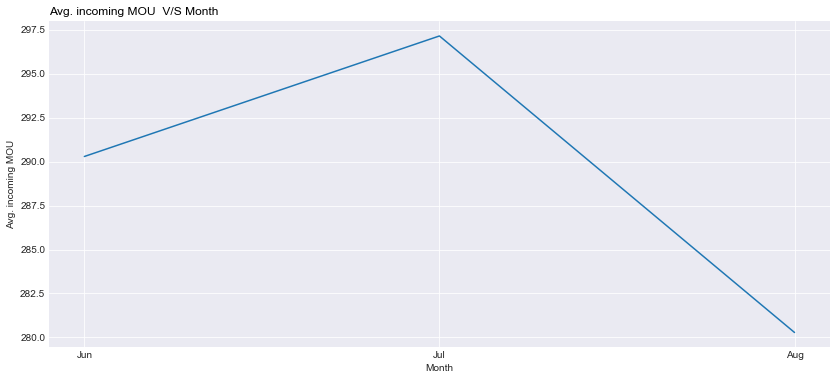

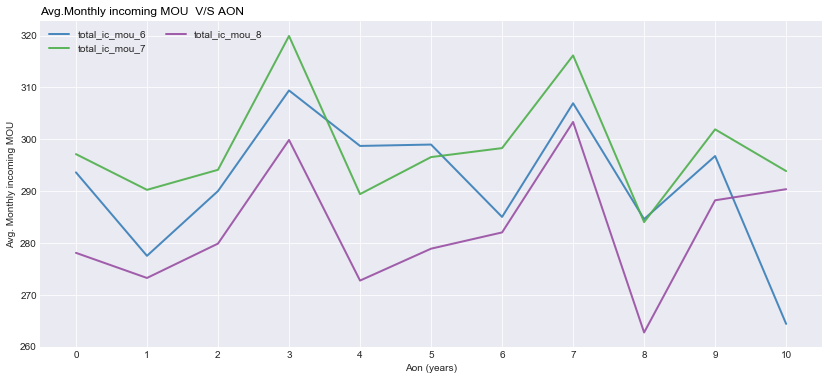

In [62]:
# Plotting Avg. total monthly incoming MOU vs AON.

ic_col = Churn_Telecom_Data.filter(regex = "total_ic_mou").columns
plot_avgMonthlyCalls("single", Churn_Telecom_Data, calltype = "incoming", colList = ic_col)
plot_avgMonthlyCalls("multi", Churn_Telecom_Data, calltype = "incoming", colList = ic_col)

Observation :
- The more a customer stays on with the operator(AON), more are the total monthly incoming MOU.
- Total Incoming MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands.
- Total Incoming MOU avg. for Aug(_8) cease to increace, infact it shows a decline compared to Jul(_7).
- Total Incoming MOU avg. for Sep(_9) is well below the first months(jun _6) avg.
- Althought the Total incoming mou avg inceases from jun to july, it drop little from aug and reduces lower than that for jun.

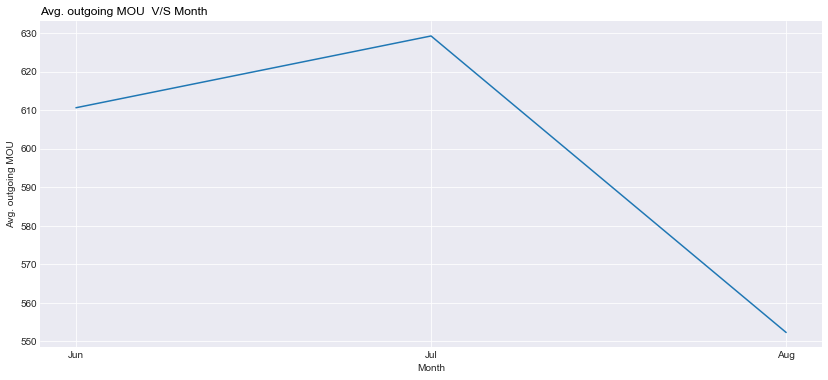

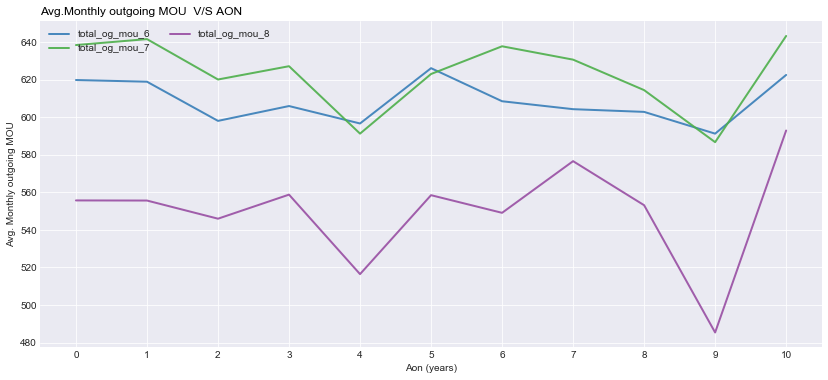

In [63]:
# Plotting Average total monthly outgoing MOU vs AON.

og_col = Churn_Telecom_Data.filter(regex = "total_og_mou").columns
plot_avgMonthlyCalls("single", Churn_Telecom_Data, calltype = "outgoing", colList = og_col)
plot_avgMonthlyCalls("multi", Churn_Telecom_Data, calltype = "outgoing", colList = og_col)

Observation :
- Overall, the Avg. total outgoing usage reduces with the increasing age on network.
- Total Outgoing MOU avg. for Jul(_7) are more than the previous Jun(_6) for customers in all AON bands, except in the AON band between 7 - 8 years where it is almost simillar.
- Total outgoing MOU avg. for Aug(_8) cease to increace, infact it shows a significant decline compared to Jul(_7).
- Total outgoing MOU avg. for Sep(_9) is the lowest of all 4 months.
- The Avg. outgoing usage reduces drastically for customers in the AON band between 7 - 8  years.

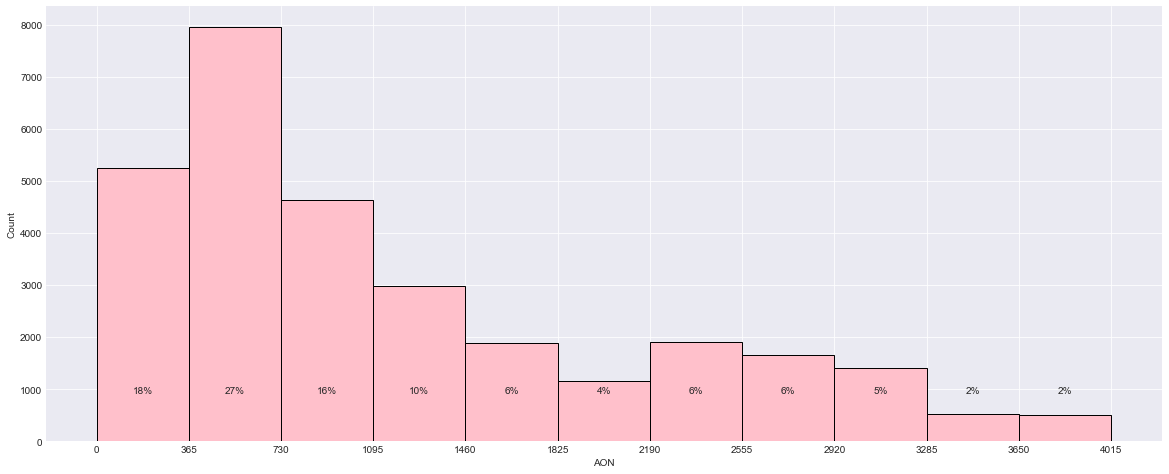

In [64]:
# Customers distribution of the age on network.

plot_hist(Churn_Telecom_Data, "aon", 365)

Observation :
- Minimun Age on network is 180 days and Average age on network for customers is 1200 days (3.2 years).
- 27% of the HV users are in their 2nd year with the network.
- Almost 71% users have Age on network less than 4 years and 15% users are with the network from over 7 years.

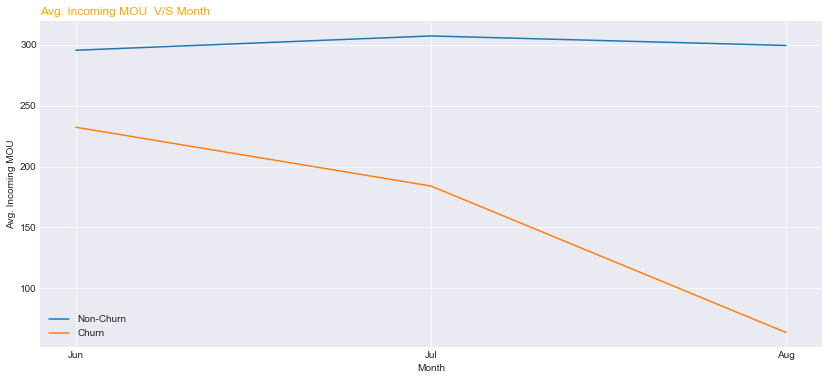

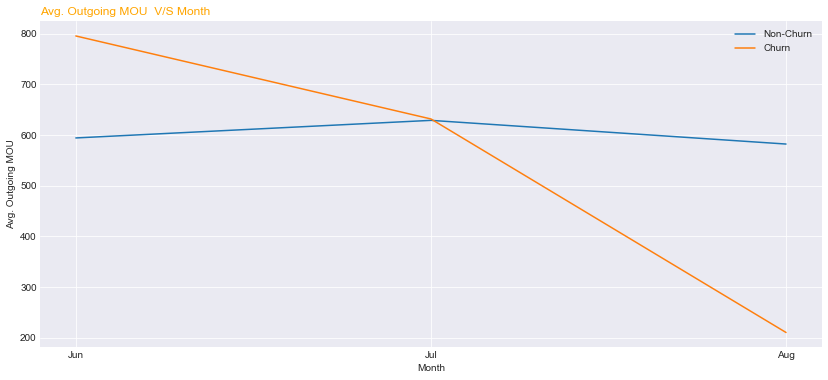

In [65]:
# Plot for the minutes usage for incoming and outgoing calls in month of june, july, aug vs churn.

ic_col = ["total_ic_mou_6", "total_ic_mou_7", "total_ic_mou_8"]
og_col = ["total_og_mou_6", "total_og_mou_7", "total_og_mou_8"]
plot_byChurnMou(ic_col, "Incoming")
plot_byChurnMou(og_col, "Outgoing")

Observation :
- Churners Avg. Incoming/Outgoing MOU's drops drastically after the 2nd month, Jul.
- While the non-churners Avg. MOU's remains consistant and stable with each month.
- Therefore, users MOU is a key feature to predict churn.

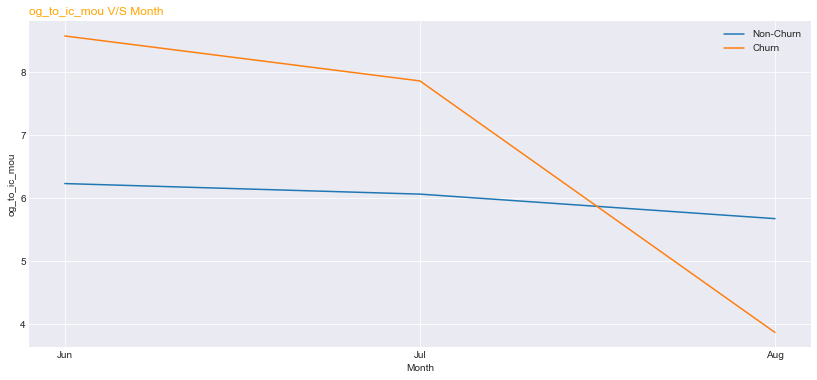

og_to_ic_mou_6  og_to_ic_mou_7  og_to_ic_mou_8
Churn                                                
0            6.235602        6.067952        5.678424
1            8.580257        7.865938        3.870145

In [66]:
# Plot for Minutes of usage for incoming and outgoing calls and churn.

plot_byChurn(Churn_Telecom_Data, "og_to_ic_mou")

Observation :
- Outgoing to incoming mou remains drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

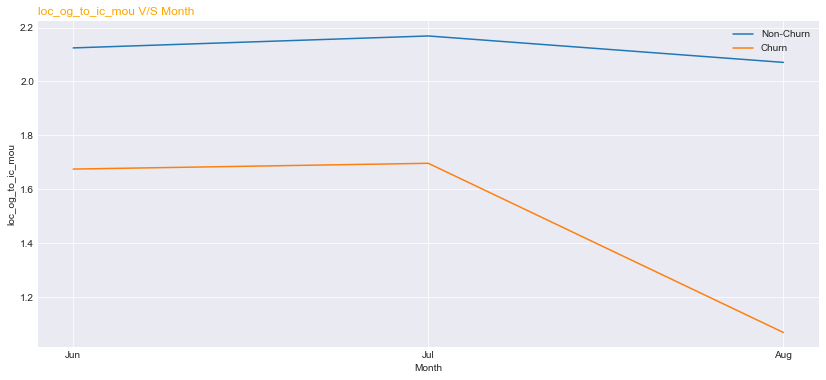

loc_og_to_ic_mou_6  loc_og_to_ic_mou_7  loc_og_to_ic_mou_8
Churn                                                            
0                2.124471            2.168763            2.070806
1                1.675413            1.696809            1.069765

In [67]:
# Plot for local outgoing and incoming calls minutes of usage and churn.

plot_byChurn(Churn_Telecom_Data, "loc_og_to_ic_mou")

Observation :
- The local outgoing to incoming call mou ratio is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 3 months.
- The churners genrally show a low loc mou ratio but it drops dramatically after the 2nd month.
- This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

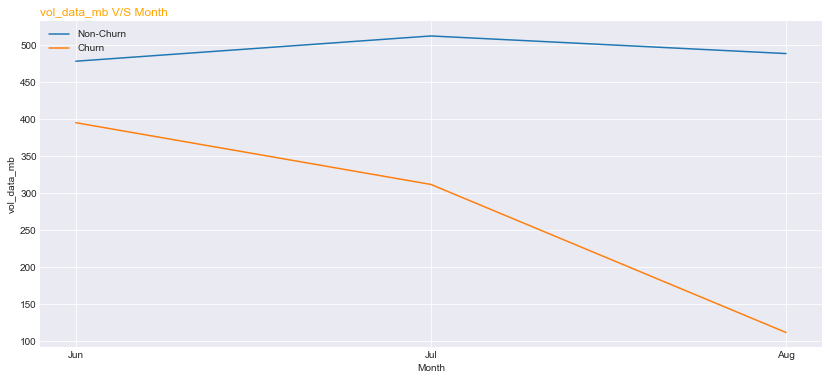

vol_data_mb_6  vol_data_mb_7  vol_data_mb_8
Churn                                             
0         478.037762     512.164072     488.389661
1         394.949545     311.507444     111.469396

In [68]:
# Plot for volume of data used in mb and churn.

plot_byChurn(Churn_Telecom_Data, "vol_data_mb")

Observation :
- The volume of data mb used drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

In [69]:
# Plot for max recharge amout and churn column to identify churn activity.

plot_byChurn(Churn_Telecom_Data, "max_rech_amt")

max_rech_amt_6  max_rech_amt_7  max_rech_amt_8
Churn                                                
0          169.160943      173.437282      166.865250
1          170.930108      160.152192       86.026468

Observation :
- maximum recharge amount also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

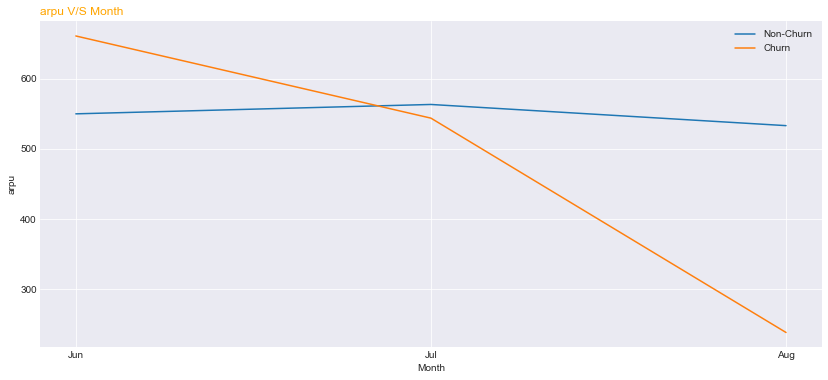

arpu_6      arpu_7      arpu_8
Churn                                    
0      549.843524  563.190828  533.052496
1      660.695411  543.722952  238.631887

In [70]:
# Plot for average revenue per user and churn.

plot_byChurn(Churn_Telecom_Data, "arpu")

Observation :
- Average revenue per user,arpu also drops significantly for churners from month Jul(6) to Aug(7).
- While it remains almost consistent for the non-churners.

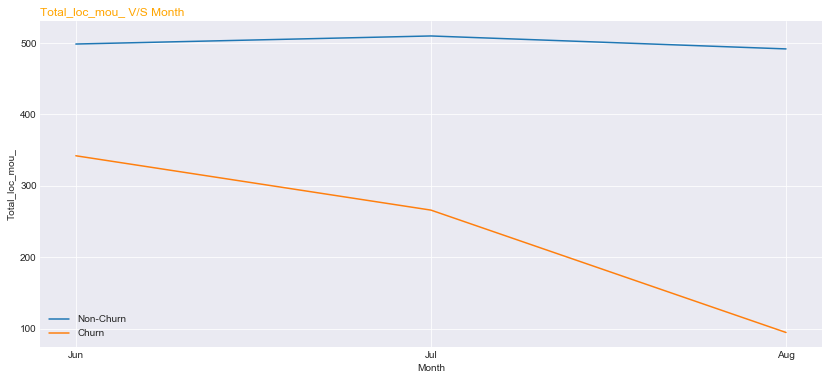

Total_loc_mou_6  Total_loc_mou_7  Total_loc_mou_8
Churn                                                   
0           498.548969       509.835211       491.705600
1           342.113462       266.025666        94.701154

In [71]:
# Plot for total local minutes of usage and chuen column.

plot_byChurn(Churn_Telecom_Data, "Total_loc_mou_")

Observation :
- The Total local call mou is genrally low for churners right from the begining of the good phase.
- local mou pattern for the non-churners remains almost constant through out the 3 months.
- The churners genrally show a low total loc mou but it drops dramatically after the 2nd month.
- This might suggest that people who are not making/reciving much local calls during their tenure are more likely to churn.

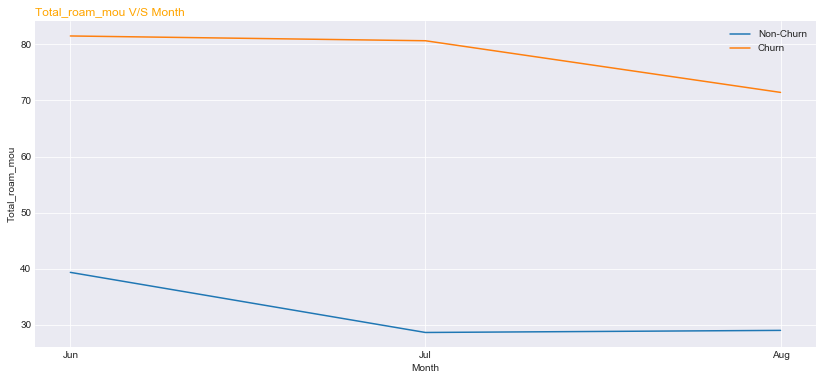

Total_roam_mou_6  Total_roam_mou_7  Total_roam_mou_8
Churn                                                      
0             39.360033         28.643301         29.016734
1             81.504156         80.651973         71.443623

In [72]:
# Plot for total roaming minutes of usage and churn column.

plot_byChurn(Churn_Telecom_Data, "Total_roam_mou")

Observation :
- Surprisingly, the roaming usage of churners is way higher than those of non-churners across all months
- People who are making/reciving more roaming calls during their tenure are more likely to churn.
- This might suggest that the operators roaming tariffs are higher than what are offered by its competitor, thus forming one of the reasons of churn.

##### last_day_rch_amt VS Churn 

In [73]:
# Plot for last day of recharge amount and churn column.

plot_byChurn(Churn_Telecom_Data, "last_day_rch_amt")

last_day_rch_amt_6  last_day_rch_amt_7  last_day_rch_amt_8
Churn                                                            
0              100.657232          102.318284           97.451724
1              104.085194           78.956989           35.955749

Observation :
- The avg. last recharge amount for churners is less than half the amount of that of the non-churners.
- Suggesting, as the recharge amount reduces for a customer its chances to churn increases.

### 6.2.1. Univariate analysis for categorical variables.

In [74]:
# Univariate analysis for "date_of_last_rech_6" column.

plt.figure(figsize = (18, 8))
sns.countplot(Churn_Telecom_Data["date_of_last_rech_6"])
plt.title("Date of last recharge in month of June", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Observation :
- Most of the customers has done there recharge at the end of the month.
- There are very few customers who pays the bill in advance or before the deadline.

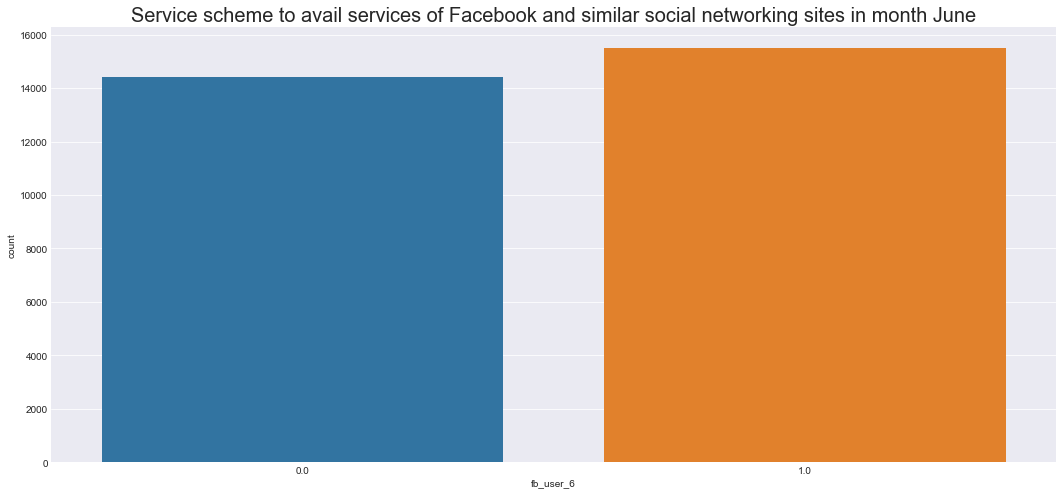

In [75]:
# Univariate analysis for "fb_user_6" column.

plt.figure(figsize = (18, 8))
sns.countplot(Churn_Telecom_Data["fb_user_6"])
plt.title("Service scheme to avail services of Facebook and similar social networking sites in month June", fontsize = 20)
plt.show()

Observation :
- There are almost equal number of customers who has service scheme to avail services of facebook and similar social networking sites in month june and those who dont have that scheme.
- More than half of the customers has the facebook related service scheme.

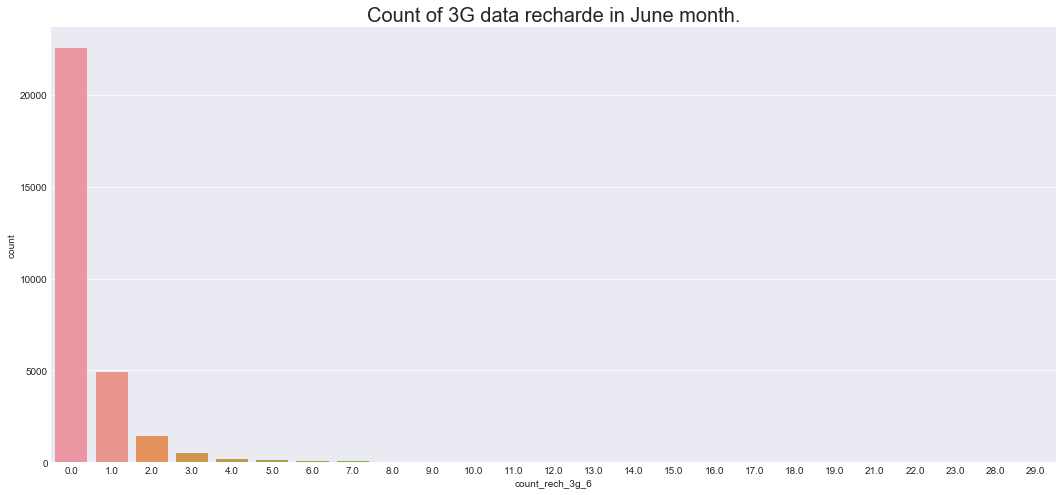

In [76]:
# Univariate analysis for "count_rech_3g_6" column.

plt.figure(figsize = (18, 8))
sns.countplot(Churn_Telecom_Data["count_rech_3g_6"])
plt.title("Count of 3G data recharde in June month.", fontsize = 20)
plt.show()

Observation :
- Most of the customers does recharge for 3G data once per month. (around 85 percent).
- There are some customers who does 3G recharge twice an month or thrice a month.

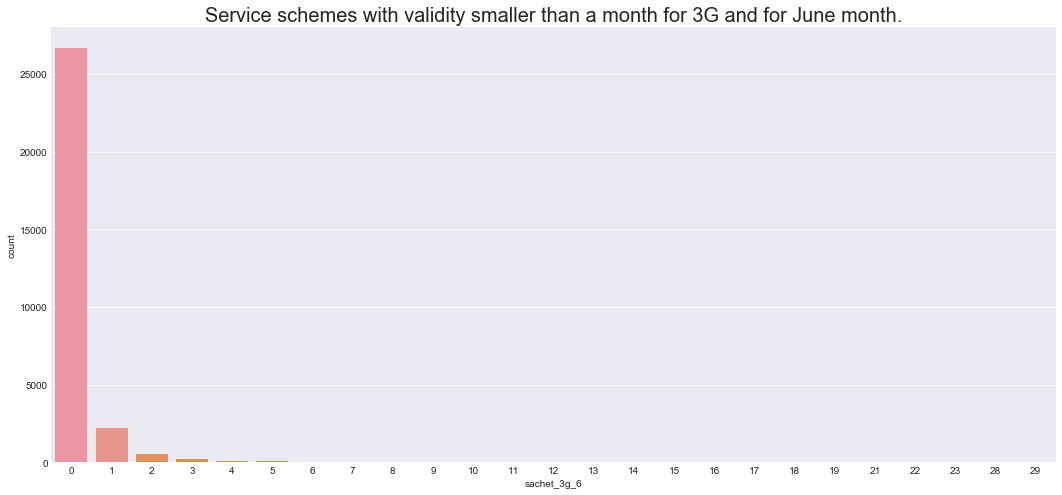

In [77]:
# Univariate analysis for "sachet_3g_6" column.

plt.figure(figsize = (18, 8))
sns.countplot(Churn_Telecom_Data["sachet_3g_6"])
plt.title("Service schemes with validity smaller than a month for 3G and for June month.", fontsize = 20)
plt.show()

Observation :
- Most of the customers also pays for sachet 3G service schemes which is smaller than month.
- This are those customers who either require some more amount of 3G data every month or they require less data as compare to total month recharge on 3G.

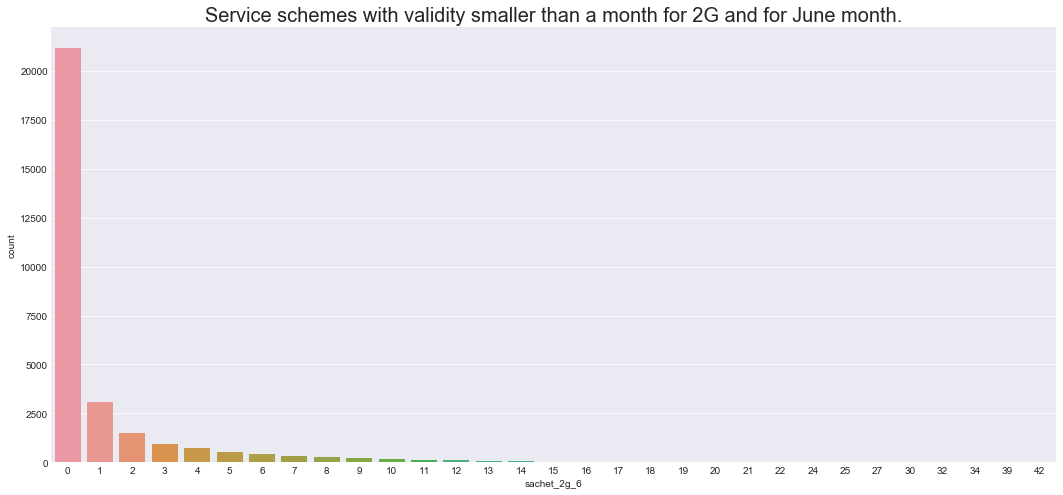

In [78]:
# Univariate analysis for "sachet_2g_6" column.

plt.figure(figsize = (18, 8))
sns.countplot(Churn_Telecom_Data["sachet_2g_6"])
plt.title("Service schemes with validity smaller than a month for 2G and for June month.", fontsize = 20)
plt.show()

Observation :
- Most of the customers also pays for sachet 2G service schemes which is smaller than month.
- This are those customers who either require some more amount of 3G data every month or they require less data as compare to total month recharge on 2G.

### 6.2.2. Univariate analysis for numerical variables.

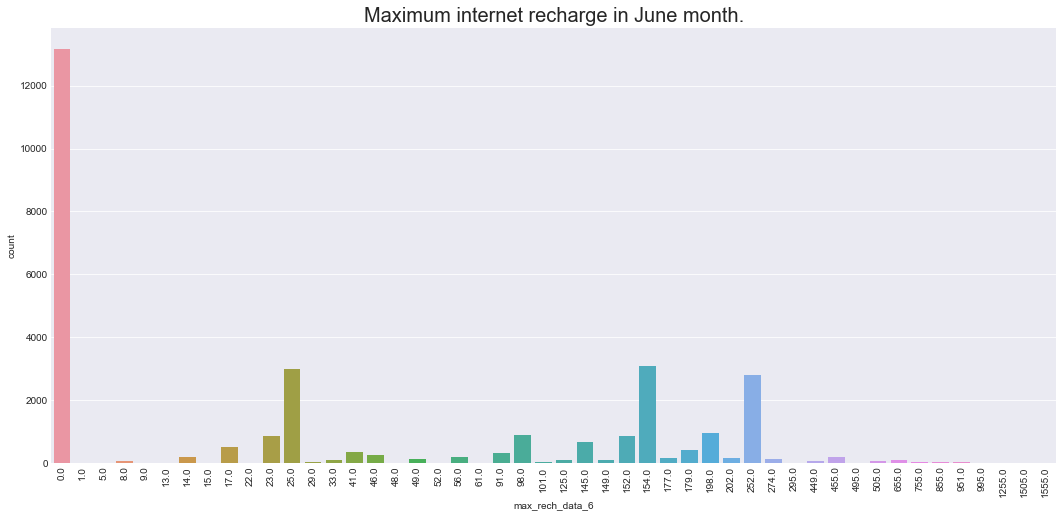

In [79]:
# Univariate analysis for "max_rech_data_6" continous variable.

plt.figure(figsize = (18, 8))
sns.countplot(Churn_Telecom_Data["max_rech_data_6"])
plt.title("Maximum internet recharge in June month.", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Observation :
- Not all the customers does the 3G recharge every month.
- The customers who does recharge for 3G data mostly done for amount of 25, 154 or 252.
- Most of the customers does not do recharge for 3G data.

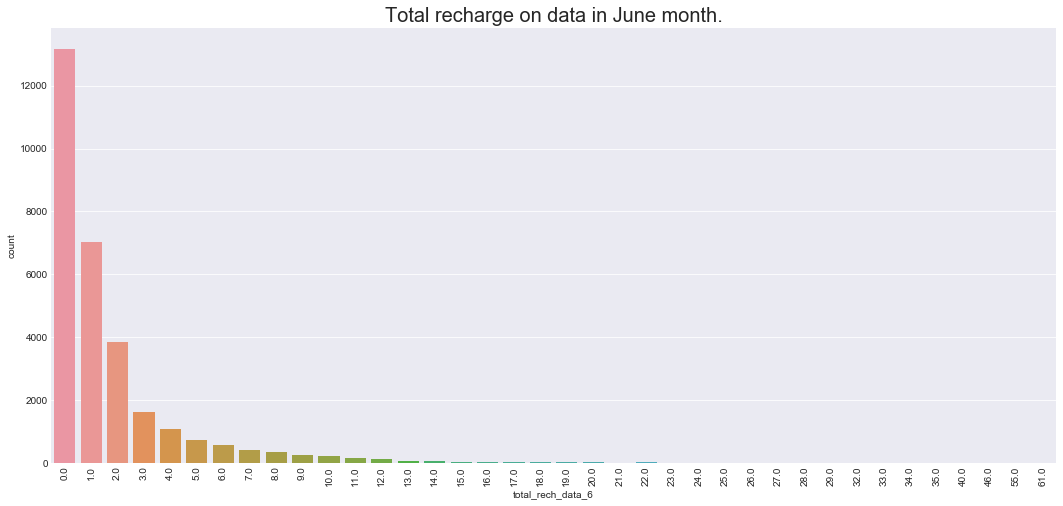

In [80]:
# Univariate analysis for "total_rech_data_6" continous variable.

plt.figure(figsize = (18, 8))
sns.countplot(Churn_Telecom_Data["total_rech_data_6"])
plt.title("Total recharge on data in June month.", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Observation :
- In the month of june most of the customers has not done the recharge for any 2G or 3G data.

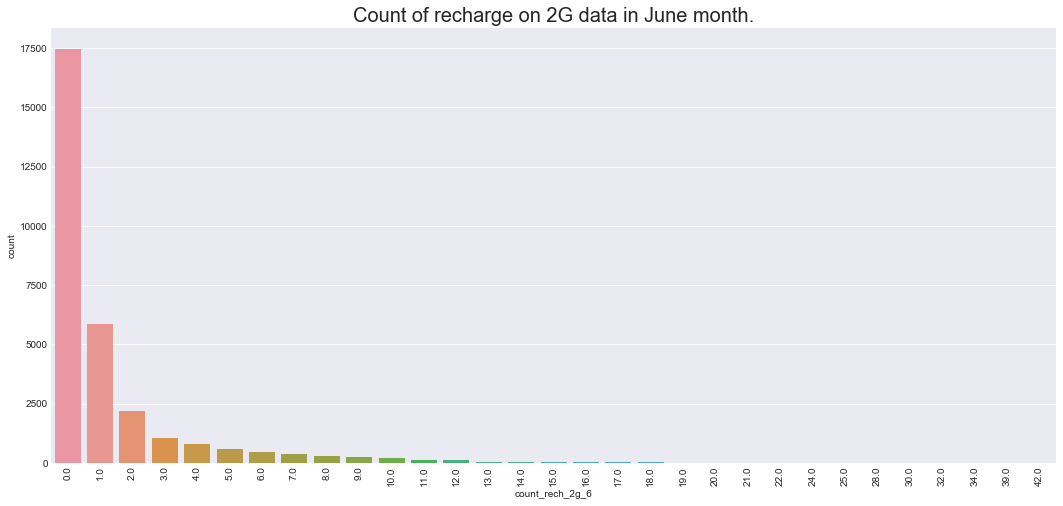

In [81]:
# Univariate analysis for "count_rech_2g_6" continous variable.

plt.figure(figsize = (18, 8))
sns.countplot(Churn_Telecom_Data["count_rech_2g_6"])
plt.title("Count of recharge on 2G data in June month.", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Observation :
- Mostly customers dont spend money on data recharges.
- the customers who does the recharge does recharge onece or twice.

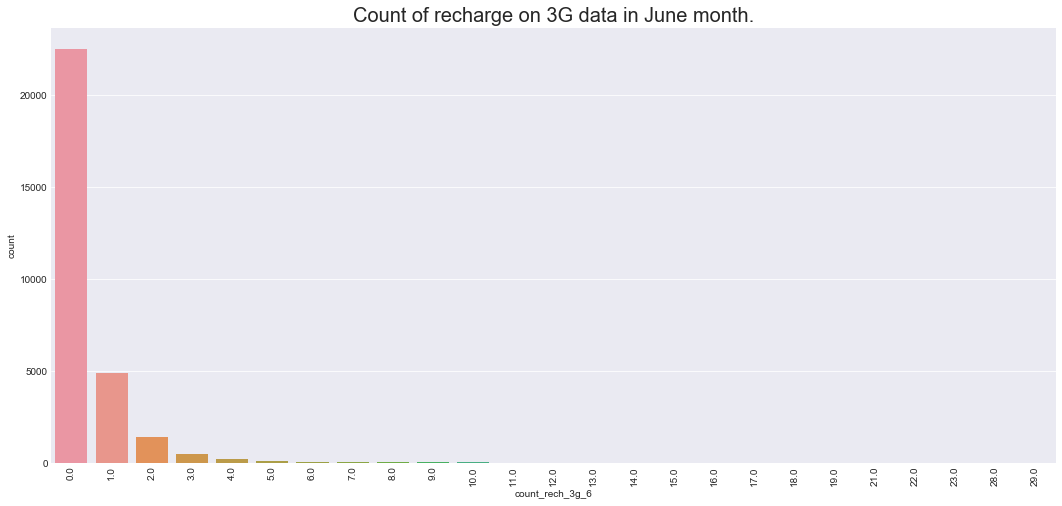

In [82]:
# Univariate analysis for "count_rech_3g_6" continous variable.

plt.figure(figsize = (18, 8))
sns.countplot(Churn_Telecom_Data["count_rech_3g_6"])
plt.title("Count of recharge on 3G data in June month.", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Observation :
- Mostly customers dont spend money on data recharges.
- the customers who does the recharge does recharge onece or twice.

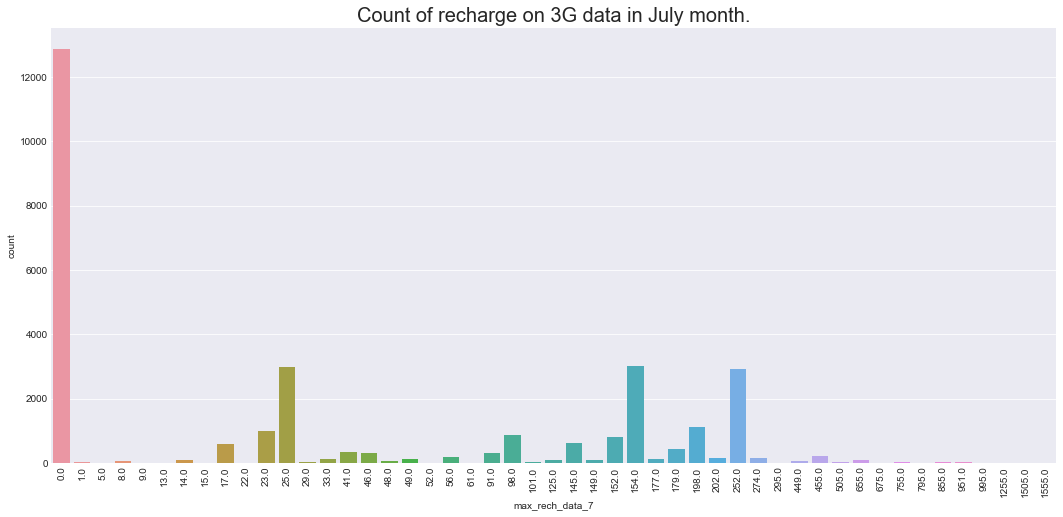

In [83]:
# Univariate analysis for "max_rech_data_7" continous variable.

plt.figure(figsize = (18, 8))
sns.countplot(Churn_Telecom_Data["max_rech_data_7"])
plt.title("Count of recharge on 3G data in July month.", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

Observation :
- Not all the customers does the 3G recharge every month.
- The customers who does recharge for 3G data mostly done for amount of 25, 154 or 252.
- Most of the customers does not do recharge for 3G data.

### 6.2.3. Bivariate analysis of Continous - Categorical variables.

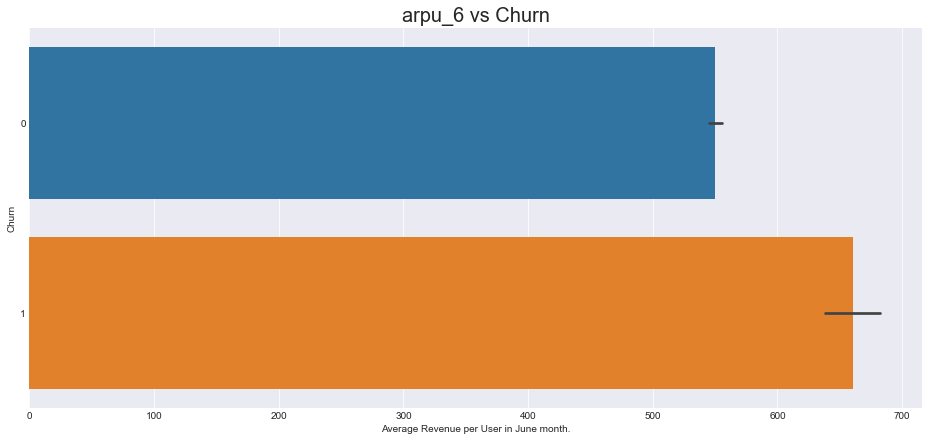

In [84]:
# Bivariate analysis for "arpu_6 vs Churn" variables.

plt.figure(figsize = (16, 7))
sns.barplot(x = "arpu_6", y = "Churn", data = Churn_Telecom_Data)
plt.xlabel("Average Revenue per User in June month.")
plt.ylabel("Churn")
#plt.xscale("log")
plt.title("arpu_6 vs Churn", fontsize = 20)
plt.show()

Observation :
- There are chances that some customers who does more revenue in june month still they churn. 

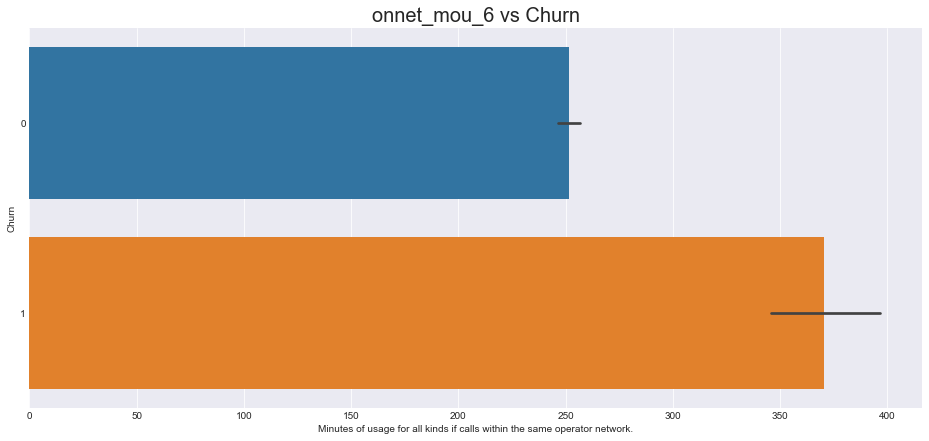

In [85]:
# Bivariate analysis for "onnet_mou_6 vs Churn" variables.

plt.figure(figsize = (16, 7))
sns.barplot(x = "onnet_mou_6", y = "Churn", data = Churn_Telecom_Data)
plt.xlabel("Minutes of usage for all kinds if calls within the same operator network.")
plt.ylabel("Churn")
#plt.xscale("log")
plt.title("onnet_mou_6 vs Churn", fontsize = 20)
plt.show()

Observation :
- The customers who does more use of minutes of usage for all kinds if calls within the same operator network are still can be churn due to some reason.

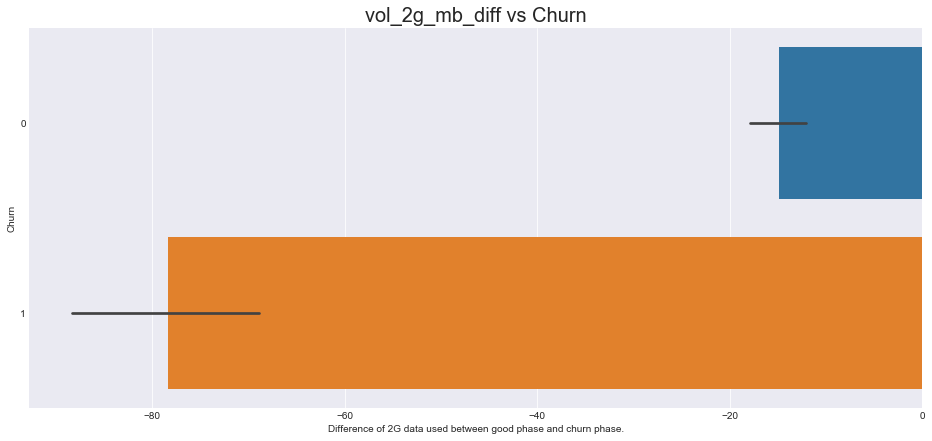

In [86]:
# Bivariate analysis for "vol_2g_mb_diff vs Churn" variables.

plt.figure(figsize = (16, 7))
sns.barplot(x = "vol_2g_mb_diff", y = "Churn", data = Churn_Telecom_Data)
plt.xlabel("Difference of 2G data used between good phase and churn phase.")
plt.ylabel("Churn")
#plt.xscale("log")
plt.title("vol_2g_mb_diff vs Churn", fontsize = 20)
plt.show()

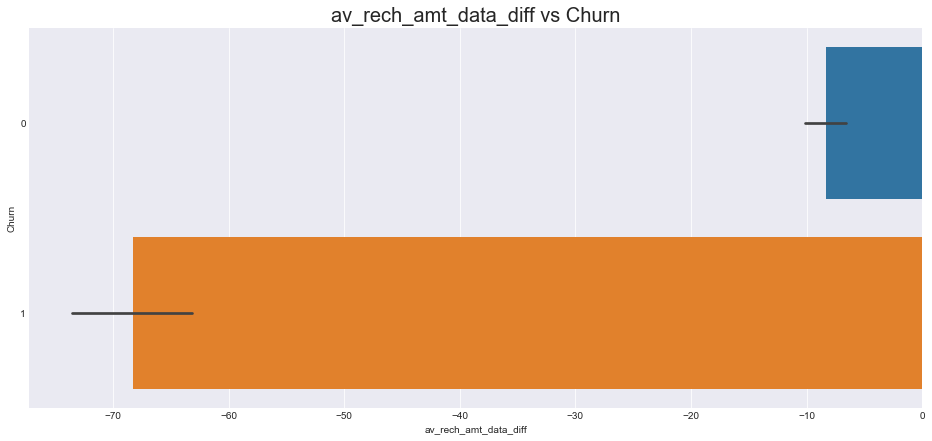

In [87]:
# Bivariate analysis for "av_rech_amt_data_diff vs Churn" variables.

plt.figure(figsize = (16, 7))
sns.barplot(x = "av_rech_amt_data_diff", y = "Churn", data = Churn_Telecom_Data)
plt.xlabel("av_rech_amt_data_diff")
plt.ylabel("Churn")
#plt.xscale("log")
plt.title("av_rech_amt_data_diff vs Churn", fontsize = 20)
plt.show()

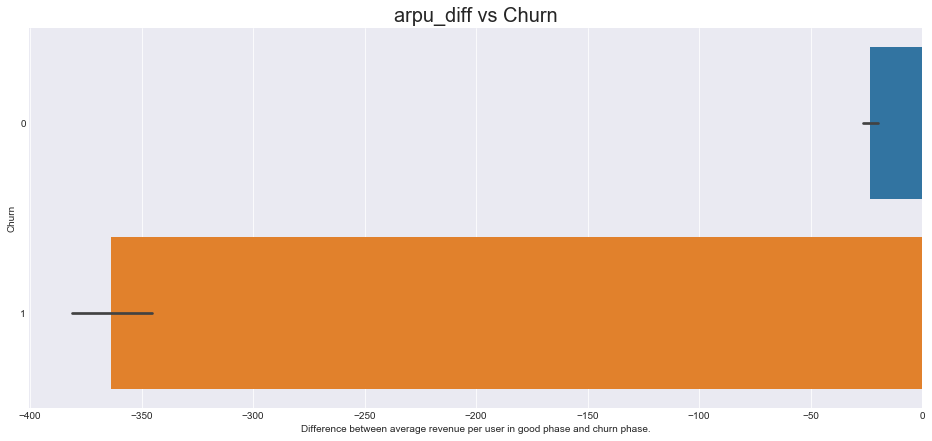

In [88]:
# Bivariate analysis for "arpu_diff vs Churn" variables.

plt.figure(figsize = (16, 7))
sns.barplot(x = "arpu_diff", y = "Churn", data = Churn_Telecom_Data)
plt.xlabel("Difference between average revenue per user in good phase and churn phase.")
plt.ylabel("Churn")
#plt.xscale("log")
plt.title("arpu_diff vs Churn", fontsize = 20)
plt.show()

### 6.2.4. Bivariate analysis for Categorical - Categorical variables.

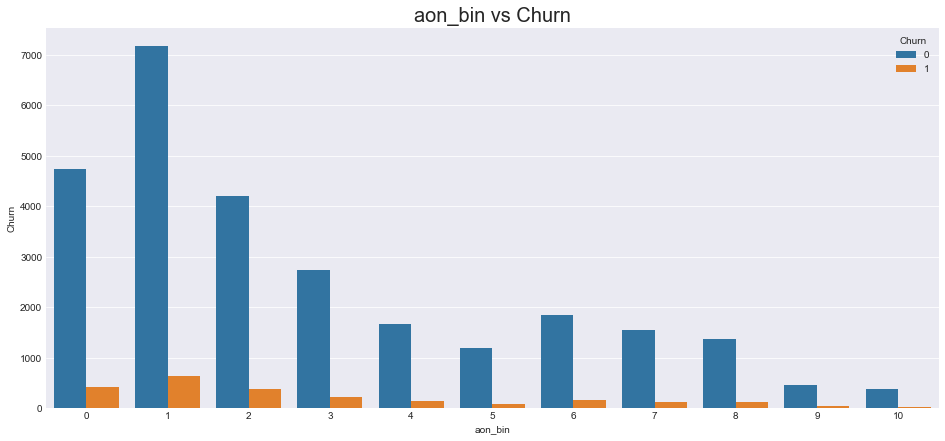

In [89]:
# Bivariate analysis for "aon_bin vs Churn" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "aon_bin", hue = "Churn", data = Churn_Telecom_Data)
plt.xlabel("aon_bin")
plt.ylabel("Churn")
plt.xticks(rotation = 0)
plt.title("aon_bin vs Churn", fontsize = 20)
plt.show()

Observation :
- The customers who are using the service of network for less than a year or 1 year are more tends to churn.
- The customers who has using the same network more than 3 or 4 years are less tends to churn.

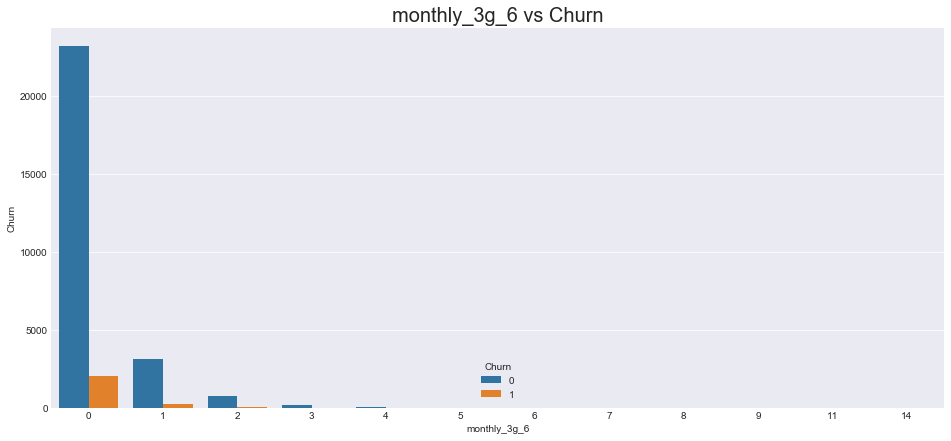

In [90]:
# Bivariate analysis for "monthly_3g_6 vs Churn" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "monthly_3g_6", hue = "Churn", data = Churn_Telecom_Data)
plt.xlabel("monthly_3g_6")
plt.ylabel("Churn")
plt.xticks(rotation = 0)
plt.title("monthly_3g_6 vs Churn", fontsize = 20)
plt.show()

Observation :
- The customers who dont use the 3G data service every month are more tend to churn.

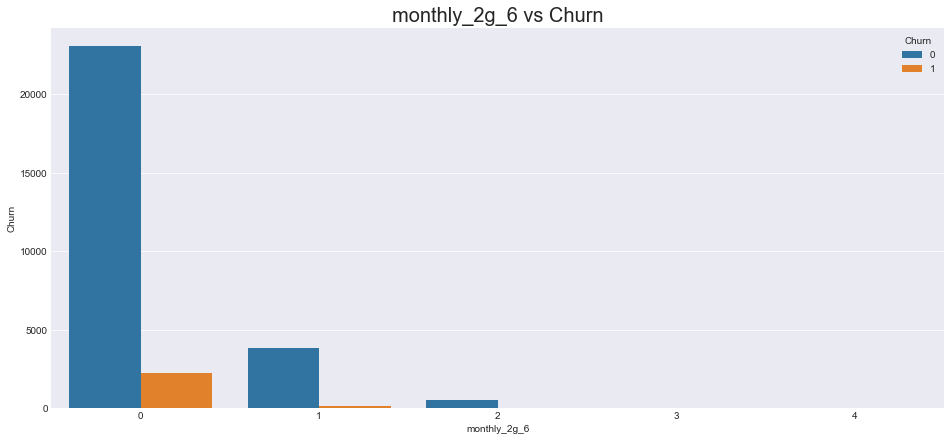

In [91]:
# Bivariate analysis for "monthly_2g_6 vs Churn" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "monthly_2g_6", hue = "Churn", data = Churn_Telecom_Data)
plt.xlabel("monthly_2g_6")
plt.ylabel("Churn")
plt.xticks(rotation = 0)
plt.title("monthly_2g_6 vs Churn", fontsize = 20)
plt.show()

Observation :
- The customers who dont use the 2G data service every month are more tend to churn.

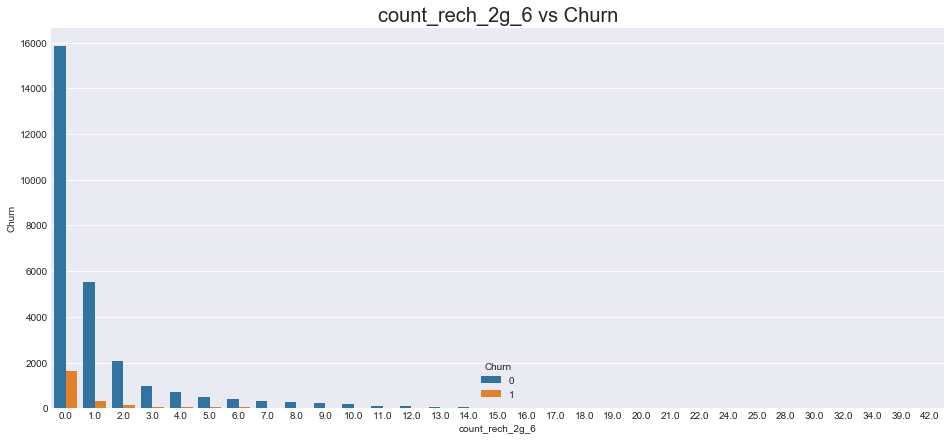

In [92]:
# Bivariate analysis for "count_rech_2g_6 vs Churn" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "count_rech_2g_6", hue = "Churn", data = Churn_Telecom_Data)
plt.xlabel("count_rech_2g_6")
plt.ylabel("Churn")
plt.xticks(rotation = 0)
plt.title("count_rech_2g_6 vs Churn", fontsize = 20)
plt.show()

Observation :
- The cusotmers who dont do recharge every month or only use service for a month are more tends to churn.
- The customers who does recharge more than once are less tends to churn.

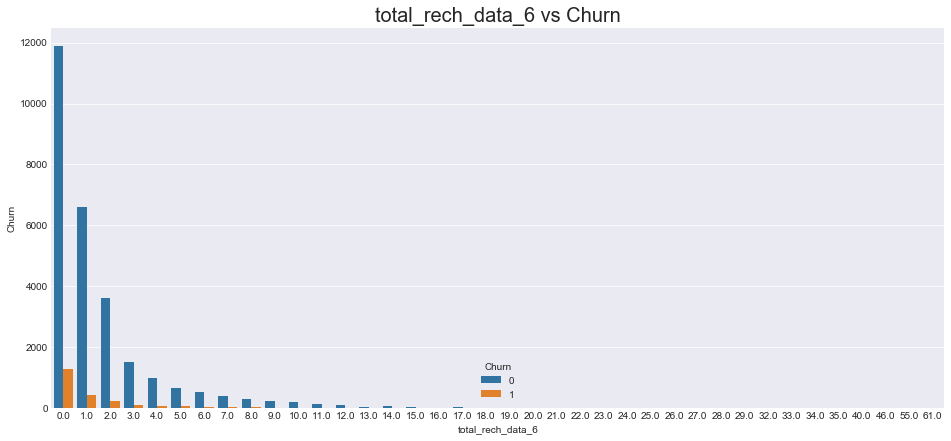

In [93]:
# Bivariate analysis for "total_rech_data_6 vs Churn" variables.

plt.figure(figsize = (16, 7))
sns.countplot(x = "total_rech_data_6", hue = "Churn", data = Churn_Telecom_Data)
plt.xlabel("total_rech_data_6")
plt.ylabel("Churn")
plt.xticks(rotation = 0)
plt.title("total_rech_data_6 vs Churn", fontsize = 20)
plt.show()

Observation :
- The cusotmers who dont do data recharge every month or only use service for a month are more tends to churn.
- The customers who does data recharge more than once are less tends to churn.

In [94]:
# Dropping the unessesary and date columns.

Churn_Telecom_Data.drop(Churn_Telecom_Data[["date_of_last_rech_6", "date_of_last_rech_7", "date_of_last_rech_8"]], axis = 1, inplace = True)

### 6.3. Checking the correlation of features.

In [95]:
# Check the correlation matrix.

Correlation_matrix = Churn_Telecom_Data.corr()
Correlation_matrix

mobile_number    arpu_6    arpu_7    arpu_8  \
mobile_number               1.000000  0.034039  0.029701  0.034711   
arpu_6                      0.034039  1.000000  0.673890  0.614850   
arpu_7                      0.029701  0.673890  1.000000  0.759918   
arpu_8                      0.034711  0.614850  0.759918  1.000000   
onnet_mou_6                 0.010664  0.343062  0.211416  0.151629   
onnet_mou_7                 0.006510  0.216614  0.320408  0.233492   
onnet_mou_8                 0.008771  0.187352  0.270032  0.347362   
offnet_mou_6                0.022721  0.510497  0.351539  0.279096   
offnet_mou_7                0.013814  0.340498  0.489832  0.376732   
offnet_mou_8                0.020335  0.286540  0.395579  0.524288   
roam_ic_mou_6               0.010856  0.127160  0.092279  0.087887   
roam_ic_mou_7              -0.002363  0.083686  0.093580  0.077694   
roam_ic_mou_8               0.005105  0.090516  0.093816  0.110760   
roam_og_mou_6               0.005817  0.196500  0.133331  0.128244   
roam_og_mou_7              -0.001322  0.143641  0.179861  0.141518   
roam_og_mou_8              -0.002905  0.125179  0.152057  0.199073   
loc_og_t2t_mou_6            0.047881  0.167593  0.106302  0.101054   
loc_og_t2t_mou_7            0.045532  0.127931  0.157563  0.132922   
loc_og_t2t_mou_8            0.044737  0.124011  0.134991  0.178587   
loc_og_t2m_mou_6            0.079826  0.333102  0.215065  0.211871   
loc_og_t2m_mou_7            0.077148  0.245873  0.302808  0.266530   
loc_og_t2m_mou_8            0.080738  0.219016  0.255661  0.352343   
loc_og_t2f_mou_6            0.051573  0.139812  0.111950  0.120754   
loc_og_t2f_mou_7            0.052637  0.114792  0.140826  0.135099   
loc_og_t2f_mou_8            0.056235  0.104648  0.121717  0.160078   
loc_og_t2c_mou_6           -0.011870  0.047656  0.008813  0.002039   
loc_og_t2c_mou_7           -0.014506  0.010586  0.040169  0.021413   
loc_og_t2c_mou_8           -0.006068  0.012708  0.032593  0.057075   
loc_og_mou_6                0.084748  0.329746  0.213015  0.208244   
loc_og_mou_7                0.081898  0.246901  0.304047  0.264579   
loc_og_mou_8                0.082932  0.224057  0.255406  0.346916   
std_og_t2t_mou_6           -0.016108  0.274581  0.166608  0.102777   
std_og_t2t_mou_7           -0.019265  0.161875  0.260491  0.178569   
std_og_t2t_mou_8           -0.014843  0.134227  0.219767  0.279402   
std_og_t2m_mou_6           -0.024782  0.302187  0.203728  0.121199   
std_og_t2m_mou_7           -0.028127  0.182055  0.307533  0.207025   
std_og_t2m_mou_8           -0.024377  0.140662  0.238991  0.324253   
std_og_t2f_mou_6            0.025591  0.066961  0.052387  0.056451   
std_og_t2f_mou_7            0.018173  0.053704  0.070523  0.068076   
std_og_t2f_mou_8            0.022181  0.043983  0.053609  0.070953   
std_og_mou_6               -0.026843  0.386605  0.248501  0.150760   
std_og_mou_7               -0.031379  0.231063  0.381378  0.259269   
std_og_mou_8               -0.025670  0.182947  0.305040  0.401575   
isd_og_mou_6               -0.003295  0.467881  0.417189  0.394715   
isd_og_mou_7               -0.002926  0.421639  0.509143  0.438003   
isd_og_mou_8               -0.003746  0.414392  0.452580  0.455284   
spl_og_mou_6               -0.018411  0.122952  0.066914  0.099790   
spl_og_mou_7               -0.020851  0.069164  0.114691  0.124901   
spl_og_mou_8               -0.012868  0.045370  0.070127  0.108112   
og_others_6                -0.006505  0.054859  0.017744  0.013014   
total_og_mou_6              0.022046  0.555760  0.365133  0.275722   
total_og_mou_7              0.014058  0.364399  0.535378  0.401519   
total_og_mou_8              0.020117  0.303225  0.428818  0.561494   
loc_ic_t2t_mou_6            0.033335  0.083100  0.045609  0.048786   
loc_ic_t2t_mou_7            0.030591  0.063171  0.076232  0.071506   
loc_ic_t2t_mou_8            0.033860  0.063037  0.073640  0.106180   
loc_ic_t2m_mou_6            0.063

### 6.4. Outlier Treatment.

In [96]:
# Get the percentiles and distribution of dataframe.

Churn_Telecom_Data.describe(percentiles = [0.01, 0.10, .25, .5, .75, .90, .95, .99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.990600e+04  29906.000000  29906.000000  29906.000000  29906.000000   
mean    7.001206e+09    558.806269    561.616785    509.247607    261.171296   
std     6.907405e+05    460.374956    480.202624    502.346776    460.136333   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
1%      7.000026e+09      1.098500      1.324000      0.000000      0.000000   
10%     7.000251e+09    171.863500    178.390500     84.817000      0.730000   
25%     7.000609e+09    310.568500    310.641000    231.802000     17.160000   
50%     7.001203e+09    482.619000    481.813000    427.616000     84.780000   
75%     7.001803e+09    700.290750    699.132750    662.286750    290.895000   
90%     7.002165e+09    994.248000    996.535000    978.198000    755.860000   
95%     7.002285e+09   1240.600500   1262.412750   1255.947250   1136.755000   
99%     7.002386e+09   1983.124750   1999.541800   1986.854750   2155.654000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29906.000000  29906.000000  29906.000000  29906.000000  29906.000000   
mean     268.288923    234.500335    374.178469    378.617878    335.389773   
std      480.586917    458.952539    482.957035    499.398782    482.226943   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        0.585000      0.000000     11.385000     10.635000      2.270000   
25%       16.045000     10.510000     71.730000     70.090000     46.895000   
50%       82.890000     65.730000    222.860000    220.300000    183.035000   
75%      290.755000    240.710000    488.307500    494.437500    438.937500   
90%      785.320000    666.740000    897.260000    917.595000    824.160000   
95%     1188.850000   1075.405000   1257.312500   1273.547500   1168.082500   
99%     2203.736500   2160.231000   2334.273500   2411.384000   2192.995500   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29906.000000   29906.000000   29906.000000   29906.000000   
mean       16.143950      12.664033      12.530086      26.623576   
std        76.401177      75.891527      74.235971     116.354841   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.445000      14.320000      15.070000      50.510000   
95%        84.972500      55.757500      56.455000     145.632500   
99%       344.663000     281.913500     283.178000     531.973500   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29906.000000   29906.000000      29906.000000      29906.000000   
mean       20.184344      19.917004         84.665095         85.847614   
std        96.206562     104.879093        229.124147        240.874675   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.380000          4.630000   
50%         0.000000       0.000000         24.380000         24.745000   
75%         0.000000       0.000000         78.225000         78.540000   
90%        31.180000      29.025000        188.525000        1

In [97]:
# Capping the outilers.

Numerical_Columns = [col for col in Churn_Telecom_Data.columns if col not in ["Churn", "mobile_number"]]

for col in Numerical_Columns:
    percentiles = Churn_Telecom_Data[col].quantile([0.01, 0.99]).values
    Churn_Telecom_Data[col][Churn_Telecom_Data[col] <= percentiles[0]] = percentiles[0]
    Churn_Telecom_Data[col][Churn_Telecom_Data[col] >= percentiles[1]] = percentiles[1]

In [98]:
# Check the shape of dataset after capping.

Churn_Telecom_Data.shape

(29906, 179)

In [99]:
# Check the distribution of dataset after capping.

Churn_Telecom_Data.describe(percentiles = [0.01, 0.10, .25, .5, .75, .90, .95, .99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.990600e+04  29906.000000  29906.000000  29906.000000  29906.000000   
mean    7.001206e+09    549.161399    551.894833    498.861860    252.556165   
std     6.907405e+05    357.902126    360.572947    383.390537    404.072625   
min     7.000000e+09      1.098500      1.324000      0.000000      0.000000   
1%      7.000026e+09      1.116075      1.327800      0.000000      0.000000   
10%     7.000251e+09    171.863500    178.390500     84.817000      0.730000   
25%     7.000609e+09    310.568500    310.641000    231.802000     17.160000   
50%     7.001203e+09    482.619000    481.813000    427.616000     84.780000   
75%     7.001803e+09    700.290750    699.132750    662.286750    290.895000   
90%     7.002165e+09    994.248000    996.535000    978.198000    755.860000   
95%     7.002285e+09   1240.600500   1262.412750   1255.947250   1136.755000   
99%     7.002386e+09   1983.091263   1999.539710   1986.843113   2155.458300   
max     7.002411e+09   1983.124750   1999.541800   1986.854750   2155.654000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29906.000000  29906.000000  29906.000000  29906.000000  29906.000000   
mean     259.081895    225.265334    366.432190    370.009385    325.359434   
std      418.729625    391.279336    434.887757    444.300218    409.946877   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        0.585000      0.000000     11.385000     10.635000      2.270000   
25%       16.045000     10.510000     71.730000     70.090000     46.895000   
50%       82.890000     65.730000    222.860000    220.300000    183.035000   
75%      290.755000    240.710000    488.307500    494.437500    438.937500   
90%      785.320000    666.740000    897.260000    917.595000    824.160000   
95%     1188.850000   1075.405000   1257.312500   1273.547500   1168.082500   
99%     2203.647675   2160.174950   2333.877825   2411.359300   2192.867725   
max     2203.736500   2160.231000   2334.273500   2411.384000   2192.995500   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29906.000000   29906.000000   29906.000000   29906.000000   
mean       13.620762       9.662867       9.794681      22.785004   
std        49.531401      38.835369      39.066605      79.470353   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.445000      14.320000      15.070000      50.510000   
95%        84.972500      55.757500      56.455000     145.632500   
99%       344.551850     281.840825     283.128600     531.910325   
max       344.663000     281.913500     283.178000     531.973500   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   29906.000000   29906.000000      29906.000000      29906.000000   
mean       16.710854      16.025048         76.438297         76.839011   
std        62.898463      60.585817        150.132541        151.083753   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.380000          4.630000   
50%         0.000000       0.000000         24.380000         24.745000   
75%         0.000000       0.000000         78.225000         78.540000   
90%        31.180000      29.025000        188.525000        1

### 6.5. Correlation analysis.

In [100]:
# Create correlation matrix
Correlation_Matrix = Churn_Telecom_Data.corr().abs()

# Select upper triangle of correlation matrix
Upper_Matrix = Correlation_Matrix.where(np.triu(np.ones(Correlation_Matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
High_Correlation_Col = [column for column in Upper_Matrix.columns if any(Upper_Matrix[column] > 0.95)]
High_Correlation_Col

['sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'Total_roam_mou_6',
 'Total_roam_mou_7',
 'Total_roam_mou_8']

In [101]:
# Dropping highly correlated columns.

Churn_Telecom_Data = Churn_Telecom_Data.drop(High_Correlation_Col, axis = 1)

### 6.6. Create dummy variables for categorical data.

In [102]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

Dummy_Variables = pd.get_dummies(Churn_Telecom_Data[["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", 
                                                     "monthly_2g_6", "monthly_2g_7", "monthly_2g_8", "monthly_3g_6", 
                                                     "monthly_3g_7", "monthly_3g_8", "sachet_3g_6", "sachet_3g_7", 
                                                     "sachet_3g_8", "fb_user_6", "fb_user_7", "fb_user_8", 
                                                     "aon_bin"]], drop_first = True)

# Adding the result into main dataframe.

Churn_Telecom_Data = pd.concat([Churn_Telecom_Data, Dummy_Variables], axis = 1)
Churn_Telecom_Data.head()

mobile_number    arpu_6    arpu_7      arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.80300         0.00         0.00   
1     7000701601  1069.180  1349.850  1986.85475        57.84        54.68   
2     7001524846   378.721   492.223   137.36200       413.69       351.03   
3     7002124215   514.453   597.753   637.76000       102.41       132.11   
4     7000887461    74.350   193.897   366.96600        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00          0.00          0.00          0.00           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        85.14        757.93        896.68        983.39           0.00   
4        33.58         85.41         89.36        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              

In [103]:
# Check the shape of dataset after creating dummy variables.

Churn_Telecom_Data.shape

(29906, 198)

In [104]:
# Dropping the repeated variables.

Churn_Telecom_Data = Churn_Telecom_Data.drop(["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "monthly_2g_6", 
                                              "monthly_2g_7", "monthly_2g_8", "monthly_3g_6", "monthly_3g_7", "monthly_3g_8", 
                                              "sachet_3g_6", "sachet_3g_7", "sachet_3g_8", "fb_user_6", "fb_user_7", 
                                              "fb_user_8", "aon_bin"], 1)
Churn_Telecom_Data.head()

mobile_number    arpu_6    arpu_7      arpu_8  onnet_mou_6  onnet_mou_7  \
0     7000842753   197.385   214.816   213.80300         0.00         0.00   
1     7000701601  1069.180  1349.850  1986.85475        57.84        54.68   
2     7001524846   378.721   492.223   137.36200       413.69       351.03   
3     7002124215   514.453   597.753   637.76000       102.41       132.11   
4     7000887461    74.350   193.897   366.96600        48.96        50.66   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0         0.00          0.00          0.00          0.00           0.00   
1        52.29        453.43        567.16        325.91          16.23   
2        35.08         94.66         80.63        136.48           0.00   
3        85.14        757.93        896.68        983.39           0.00   
4        33.58         85.41         89.36        205.89           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00           0.00   
1          33.49          31.64          23.74          12.59          38.06   
2           0.00           0.00           0.00           0.00           0.00   
3           0.00           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0              0.00              0.00              0.00              0.00   
1             51.39             31.38             40.28            308.63   
2            297.13            217.59             12.49             80.96   
3              4.48              6.16             23.34             91.81   
4             48.96             50.66             33.58             82.94   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00              0.00              0.00              0.00   
1            447.38            162.28             62.13             55.14   
2             70.58             50.54              0.00              0.00   
3             87.93            104.81              0.75              0.00   
4             83.01            148.56              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0               0.0              0.00   
1             53.23               0.0               0.0              0.00   
2              0.00               0.0               0.0              7.15   
3              1.58               0.0               0.0              0.00   
4              0.00               0.0               0.0             17.71   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0          0.00          0.00          0.00              0.00   
1        422.16        533.91        255.79              4.30   
2        378.09        288.18         63.04            116.56   
3         97.04         94.09        129.74             97.93   
4        131.91        133.68        182.14              0.00   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0              0.00              0.00              0.00              0.00   
1             23.29             12.01             49.89             31.76   
2            133.43             22.58             13.69             10.04   
3            125.94             61.79            665.36            808.74   
4              0.00              0.00              2.36              6.35   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             49.14              6.66             20.08             16.68   
2             75.69              0.00              0.00              0.00   
3            876.99              0.00              

In [105]:
# Check the shape of dataset after dropping repeated columns.

Churn_Telecom_Data.shape

(29906, 167)

### 6.7. Split Train and Test data. 

In [106]:
# Convert the "Churn" column into category to numeric.

Churn_Telecom_Data["Churn"] = pd.to_numeric(Churn_Telecom_Data["Churn"])
Churn_Telecom_Data.reset_index(drop = True)

# Split the train and test data.

# Putting the feature variables to X.
X = Churn_Telecom_Data.drop(["Churn", "mobile_number"], axis = 1)
# Get the target variable into y.
y = Churn_Telecom_Data["Churn"]

In [107]:
# Perform the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100, stratify = y)

In [108]:
# Check the shapes of data after splitting.

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20934, 165)
(20934,)
(8972, 165)
(8972,)


### 6.8. Scaling.

In [109]:
# Create the scaler object.

Scaler = MinMaxScaler()

In [110]:
# Perform scalling on data.


X_train = pd.DataFrame(Scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(Scaler.transform(X_test), columns = X_test.columns )

## Step 7 : Modelling.

### 7.1. Principle Component Analysis.

In [111]:
# Improting the PCA module

pca = PCA(svd_solver = "randomized", random_state = 42)

In [112]:
# Doing the PCA on the train data

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [113]:
# Get the PCA components.

print(pca.components_)
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

[[ 1.00437932e-01  1.07123848e-01  1.03400931e-01 ... -1.32589111e-03
   1.58604257e-05 -5.26094798e-04]
 [ 8.43058325e-02  8.90460707e-02  1.15350848e-01 ... -1.18536444e-03
   5.58613766e-04  9.66259900e-04]
 [ 1.19024387e-01  1.49785968e-01  1.54106958e-01 ... -1.04531988e-03
  -3.63723055e-03  2.87863823e-03]
 ...
 [-1.97245071e-03 -1.07287741e-02  1.28401652e-02 ...  4.51765275e-04
  -5.00464970e-04  1.02565024e-04]
 [ 9.10296443e-04 -1.53755035e-03  2.45597289e-03 ...  1.45084233e-04
   3.12627845e-04  6.02838069e-04]
 [ 1.54291716e-03  2.25554005e-04  7.39428258e-03 ...  2.53014710e-04
   5.60543265e-04  2.73711150e-04]]


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.100438  0.084306  0.119024 -0.013367 -0.029508 -0.009771  0.160521   
1  0.107124  0.089046  0.149786  0.005427  0.013116  0.002013 -0.008312   
2  0.103401  0.115351  0.154107  0.031872  0.061209  0.003677 -0.190931   
3  0.113587 -0.026957  0.112625  0.003647  0.009669 -0.090437  0.176445   
4  0.121511 -0.026935  0.133915  0.016845  0.033556 -0.093138  0.087172   
5  0.112363 -0.012391  0.127427  0.025858  0.051577 -0.080392 -0.004340   
6  0.134741  0.025820  0.068394 -0.007815 -0.012728  0.022343  0.062170   
7  0.139879  0.025888  0.090150  0.003290  0.011402  0.037148 -0.055951   
8  0.136842  0.047027  0.090487  0.018730  0.039443  0.031620 -0.156586   
9  0.010879  0.008070  0.019729 -0.008582 -0.026792  0.052257 -0.048029   

        PC8       PC9      PC10        Feature  
0  0.094851 -0.001816  0.068584         arpu_6  
1  0.049468 -0.003538  0.075686         arpu_7  
2 -0.010504 -0.004201  0.043501         arpu_8  
3 -0.241543  0.029116  0.048054    onnet_mou_6  
4 -0.284910  0.022345  0.068939    onnet_mou_7  
5 -0.270081  0.018531  0.075905    onnet_mou_8  
6  0.298970 -0.024071 -0.050530   offnet_mou_6  
7  0.276904 -0.027356 -0.033260   offnet_mou_7  
8  0.214353 -0.028856 -0.001199   offnet_mou_8  
9 -0.000956 -0.001112  0.093107  roam_ic_mou_6

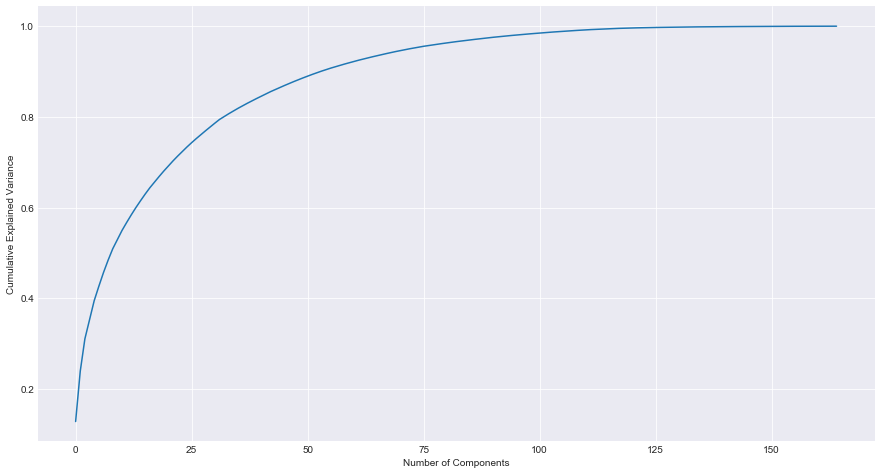

In [114]:
# Get the plot to find the optimal PCA components.

fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

##### As we can see 75 component explain 90% of variance in the data.

In [115]:
# Get the 75 PCA components.
# Using these components fit them on train data.

Final_PCA = IncrementalPCA(n_components = 75)

X_train_pca = Final_PCA.fit_transform(X_train)
X_train_pca.shape

(20934, 75)

In [116]:
# Get the correlation matrix for the PCA components.

Correlation_Matrix_2 = np.corrcoef(X_train_pca.transpose())

In [117]:
# 1s and 0s in diagonals

Correaltion_Matrix_No_Diag = Correlation_Matrix_2 - np.diagflat(Correlation_Matrix_2.diagonal())
print("Maximum Correaltion : ", Correaltion_Matrix_No_Diag.max(), ", Minimum Correlation : ", Correlation_Matrix_2.min(),)

Maximum Correaltion :  0.00956477660181743 , Minimum Correlation :  -0.009677220042326844


In [118]:
#Applying selected components to the test data.

X_test_pca = Final_PCA.transform(X_test)
X_test_pca.shape

(8972, 75)

### 7.2. Decision Tree Model with PCA. - (High Performace Model)

In [119]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.

Deci_Tree = DecisionTreeClassifier(max_depth = 5, class_weight = "balanced")
Deci_Tree.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [120]:
# Let's check the evaluation metrics of our first tree model

# Making predictions

y_Pred_Tree = Deci_Tree.predict(X_test_pca)

# Print the classification_report, confusion_matrix, accuracy_score

print("Classification Report : \n", classification_report(y_test, y_Pred_Tree))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_Pred_Tree))
print("\n Accuracy Score : ", accuracy_score(y_test, y_Pred_Tree))

Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      8247
           1       0.28      0.70      0.40       725

    accuracy                           0.83      8972
   macro avg       0.62      0.77      0.65      8972
weighted avg       0.91      0.83      0.86      8972

Confusion Matrix : 
 [[6928 1319]
 [ 216  509]]

 Accuracy Score :  0.8289121711992866


In [121]:
# Print the performace metrics for this model.

Confusion_Mat = confusion_matrix(y_test, y_Pred_Tree)

TP = Confusion_Mat[1,1] # true positive 
TN = Confusion_Mat[0,0] # true negatives
FP = Confusion_Mat[0,1] # false positives
FN = Confusion_Mat[1,0] # false negatives

# Accuracy Score.
print("Accuracy Score on test data : ", accuracy_score(y_test, y_Pred_Tree))

# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ", TP / float(TP + FN))

# Let us calculate specificity
print("Specificity : ", TN / float(TN + FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate : ", FP/ float(TN + FP))

# positive predictive value 
print("Positive Predictive Value : ", TP / float(TP + FP))

# Negative predictive value
print("Negative Predictive Value : ", TN / float(TN + FN))

# Misclassification rate
print("Misclassification Rate : ", (FN+FP)/(TP+TN+FP+FN))

# Precision 
print("Precision Socre : ", TP / float(TP + FP))

# Recall Score
print("Recall Score : ", TP / float(TP + FN))

Accuracy Score on test data :  0.8289121711992866
Sensitivity :  0.7020689655172414
Specificity :  0.8400630532314781
False Postive Rate :  0.15993694676852188
Positive Predictive Value :  0.27844638949671774
Negative Predictive Value :  0.9697648376259799
Misclassification Rate :  0.17108782880071333
Precision Socre :  0.27844638949671774
Recall Score :  0.7020689655172414


##### Hyperparameter Tuning.

In [122]:
# Using GridSearchCV to find optimal max_depth.

# Specify no. of folds for k-fold CV.

n_folds = 5

# parameters to build the model on

parameters = {"max_depth" : range(1, 40)}

# Instantiate the model.

D_Tree = DecisionTreeClassifier(criterion = "gini", class_weight = "balanced", random_state = 5)

# Fit the tree on training data.

Tree = GridSearchCV(D_Tree, parameters, cv = n_folds, scoring = "accuracy", return_train_score = True)
Tree.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=5, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs

In [123]:
# Get the scores of GridSearch CV.

GridSearch_Scores = Tree.cv_results_
pd.DataFrame(GridSearch_Scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.179969      0.030305         0.000798        0.000978   
1        0.295392      0.004342         0.000399        0.000798   
2        0.426519      0.014036         0.003531        0.006114   
3        0.607788      0.071845         0.000798        0.000977   
4        0.658327      0.000453         0.000000        0.000000   
5        0.813167      0.043735         0.000000        0.000000   
6        1.104323      0.093649         0.002191        0.000980   
7        0.981895      0.027437         0.000000        0.000000   
8        1.056009      0.007644         0.003125        0.006250   
9        1.172114      0.078487         0.000399        0.000798   
10       1.212311      0.012657         0.000000        0.000000   
11       1.271452      0.007687         0.000000        0.000000   
12       1.337734      0.012159         0.003125        0.006249   
13       1.377801      0.011689         0.000000        0.000000   
14       1.421540      0.000041         0.000000        0.000000   
15       1.465201      0.025008         0.000000        0.000000   
16       1.499647      0.026115         0.003125        0.006250   
17       1.515712      0.031477         0.003125        0.006250   
18       1.534219      0.041000         0.003125        0.006249   
19       1.540268      0.046949         0.003125        0.006250   
20       1.595335      0.074506         0.003124        0.006249   
21       1.568379      0.050012         0.003125        0.006250   
22       1.579428      0.059397         0.000000        0.000000   
23       1.590664      0.065037         0.000000        0.000000   
24       1.596499      0.064321         0.000000        0.000000   
25       1.609668      0.063811         0.000000        0.000000   
26       1.616438      0.075316         0.003125        0.006250   
27       1.618371      0.059782         0.003124        0.006249   
28       1.628992      0.060389         0.003126        0.006251   
29       1.633988      0.069567         0.003124        0.006249   
30       1.646488      0.064498         0.003125        0.006249   
31       1.640730      0.064089         0.000000        0.000000   
32       1.654630      0.064835         0.006249        0.007653   
33       1.661099      0.070173         0.000000        0.000000   
34       1.662107      0.069604         0.000000        0.000000   
35       1.669634      0.070256         0.003124        0.006249   
36       1.677730      0.069581         0.000000        0.000000   
37       1.683986      0.070126         0.003125        0.006250   
38       1.783453      0.120101         0.000000        0.000000   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                1   {'max_depth': 1}           0.747074           0.748030   
1                2   {'max_depth': 2}           0.842369           0.671364   
2                3   {'max_depth': 3}           0.788154           0.789587   
3                4   {'max_depth': 4}           0.818008           0.823501   
4                5   {'max_depth': 5}           0.820396           0.794841   
5                6   {'max_depth': 6}           0.791975           0.795558   
6                7   {'max_depth': 7}           0.822546           0.789826   
7                8   {'max_depth': 8}           0.809410           0.814903   
8                9   {'max_depth': 9}           0.823262           0.824457   
9               10  {'max_depth': 10}           0.839264           0.837831   
10              11  {'max_depth': 11}           0.846429           0.842130   
11              12  {'max_depth': 12}           0.851445           0.854311   
12              13  {'max_depth': 13}           0.855983           0.862431   
13              14  {'max_depth': 14}           0.856699           0.870552   
14              15  {'max_depth': 15}           0.861476           0.875090   
15              16 

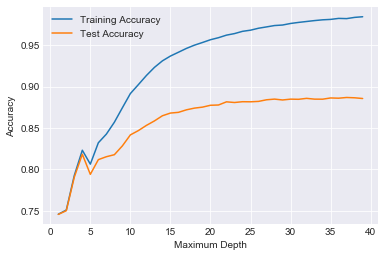

In [124]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(GridSearch_Scores["param_max_depth"], GridSearch_Scores["mean_train_score"], label = "Training Accuracy")
plt.plot(GridSearch_Scores["param_max_depth"], GridSearch_Scores["mean_test_score"], label = "Test Accuracy")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [125]:
# Lets tune min_sample_leaf

parameters = {"min_samples_leaf" : range(5, 200, 20)}

# instantiate the model

D_Tree = DecisionTreeClassifier(criterion = "gini", class_weight = "balanced", random_state = 100)

# fit tree on training data
Tree = GridSearchCV(D_Tree, parameters, cv = n_folds, scoring = "accuracy", return_train_score = True)
Tree.fit(X_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [126]:
# Get the scores of GridSearch CV.

GridSearch_Scores = Tree.cv_results_
pd.DataFrame(GridSearch_Scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.646635      0.125745         0.003125        0.006249   
1       1.303183      0.031070         0.006249        0.007653   
2       1.248478      0.042483         0.003124        0.006249   
3       1.164831      0.040145         0.000000        0.000000   
4       1.127851      0.042390         0.003125        0.006249   
5       1.074747      0.036165         0.000000        0.000000   
6       1.043503      0.036182         0.006249        0.007653   
7       1.016667      0.043402         0.006249        0.007653   
8       0.999765      0.039518         0.003125        0.006249   
9       1.006252      0.040591         0.000399        0.000798   

  param_min_samples_leaf                     params  split0_test_score  \
0                      5    {'min_samples_leaf': 5}           0.856460   
1                     25   {'min_samples_leaf': 25}           0.816336   
2                     45   {'min_samples_leaf': 45}           0.785527   
3                     65   {'min_samples_leaf': 65}           0.770719   
4                     85   {'min_samples_leaf': 85}           0.781705   
5                    105  {'min_samples_leaf': 105}           0.767614   
6                    125  {'min_samples_leaf': 125}           0.766181   
7                    145  {'min_samples_leaf': 145}           0.752806   
8                    165  {'min_samples_leaf': 165}           0.777167   
9                    185  {'min_samples_leaf': 185}           0.785049   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.862193           0.860998           0.858610           0.867893   
1           0.795319           0.806544           0.804156           0.806737   
2           0.777884           0.780033           0.786482           0.797898   
3           0.770241           0.785765           0.760449           0.761586   
4           0.784332           0.760688           0.773346           0.761825   
5           0.788393           0.782661           0.788870           0.761586   
6           0.780989           0.780989           0.798901           0.766125   
7           0.786721           0.777645           0.787676           0.769231   
8           0.798185           0.761643           0.779556           0.787625   
9           0.799140           0.772152           0.766420           0.803631   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.861231        0.003873                1            0.948230   
1         0.805818        0.006708                2            0.863797   
2         0.785565        0.006965                3            0.816206   
3         0.769752        0.009065               10            0.797098   
4         0.772379        0.009786                9            0.803965   
5         0.777825        0.011181                7            0.794829   
6         0.778637        0.012111                6            0.789933   
7         0.774816        0.012890                8            0.771123   
8         0.780835        0.012088                5            0.788081   
9         0.785278        0.014539                4            0.794829   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.950558            0.950857            0.946199   
1            0.857288            0.847376            0.849346   
2            0.819968            0.820027            0.815250   
3            0.800860            0.816684            0.788917   
4            0.803427            0.785812            0.795844   
5            0.797098            0.796799            0.798889   
6            0.788559            0.793635            0.802711   
7            0.793694            0.788559            0.791067   
8            0.804681            0.773751            0.786827   
9            0.803845            0.788440            0.776139   

   split4_train_

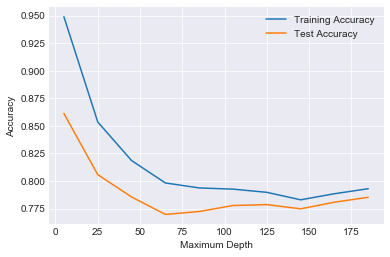

In [127]:
# plotting accuracies with min_sample_leaf.
plt.figure()
plt.plot(GridSearch_Scores["param_min_samples_leaf"], GridSearch_Scores["mean_train_score"], label = "Training Accuracy")
plt.plot(GridSearch_Scores["param_min_samples_leaf"], GridSearch_Scores["mean_test_score"], label = "Test Accuracy")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [128]:
## Tuning min sample split

parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model

D_Tree = DecisionTreeClassifier(criterion = "gini", class_weight = "balanced", random_state = 100)

# Fit tree on training data.

Tree = GridSearchCV(D_Tree, parameters, cv = n_folds, scoring = "accuracy", return_train_score = True)
Tree.fit(X_train_pca,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'m

In [129]:
# Get the scores of GridSearch CV.

GridSearch_Scores = Tree.cv_results_
pd.DataFrame(GridSearch_Scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.766026      0.093117         0.003124        0.006247   
1       1.750210      0.073266         0.000000        0.000000   
2       1.737142      0.072971         0.000000        0.000000   
3       1.696484      0.070972         0.000000        0.000000   
4       1.826786      0.272969         0.003125        0.006249   
5       1.671490      0.077145         0.006248        0.007653   
6       1.713455      0.144255         0.006655        0.011333   
7       1.685061      0.040101         0.000407        0.000814   
8       1.631349      0.100348         0.000000        0.000000   
9       1.730355      0.063261         0.001397        0.000798   

  param_min_samples_split                      params  split0_test_score  \
0                       5    {'min_samples_split': 5}           0.891569   
1                      25   {'min_samples_split': 25}           0.847146   
2                      45   {'min_samples_split': 45}           0.820635   
3                      65   {'min_samples_split': 65}           0.805111   
4                      85   {'min_samples_split': 85}           0.785288   
5                     105  {'min_samples_split': 105}           0.768569   
6                     125  {'min_samples_split': 125}           0.762837   
7                     145  {'min_samples_split': 145}           0.754956   
8                     165  {'min_samples_split': 165}           0.764748   
9                     185  {'min_samples_split': 185}           0.774063   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.892524           0.887748           0.887270           0.888438   
1           0.852878           0.857416           0.852639           0.857860   
2           0.819680           0.836160           0.828995           0.833015   
3           0.805111           0.816097           0.810604           0.820354   
4           0.786721           0.800096           0.804395           0.801720   
5           0.782422           0.795319           0.791259           0.794075   
6           0.777167           0.788393           0.776451           0.783803   
7           0.779317           0.772391           0.775496           0.777114   
8           0.776690           0.768808           0.770002           0.778548   
9           0.767853           0.762360           0.777884           0.782370   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.889510        0.002126                1            0.995223   
1         0.853588        0.003894                2            0.941422   
2         0.827697        0.006568                3            0.906132   
3         0.811455        0.006032                4            0.883561   
4         0.795644        0.008002                5            0.861647   
5         0.786329        0.009958                6            0.840509   
6         0.777730        0.008652                7            0.829820   
7         0.771855        0.008746                9            0.818117   
8         0.771759        0.005125               10            0.821222   
9         0.772906        0.007105                8            0.820087   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.995104            0.995462            0.995223   
1            0.945124            0.949961            0.952350   
2            0.912820            0.914074            0.916104   
3            0.882546            0.888219            0.883561   
4            0.857885            0.862363            0.874664   
5            0.846122            0.849466            0.857109   
6            0.833761            0.842061            0.836150   
7            0.829104            0.819848            0.833045   
8            0.821520            0.808264            0.826118   
9            0.807966            0.802592            0.82223

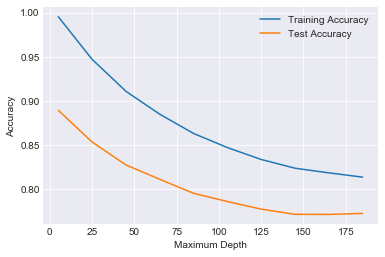

In [130]:
# plotting accuracies with min_sample_split.

plt.figure()
plt.plot(GridSearch_Scores["param_min_samples_split"], GridSearch_Scores["mean_train_score"], label = "Training Accuracy")
plt.plot(GridSearch_Scores["param_min_samples_split"], GridSearch_Scores["mean_test_score"], label = "Test Accuracy")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [131]:
# Create the parameter grid .

param_grid = {"max_depth" : range(5, 15, 5), 
              "min_samples_leaf": range(5, 200, 20), 
              "min_samples_split" : range(5, 200, 20), 
              "criterion" : ["entropy", "gini"]}
n_folds = 5

# Instantiate the grid search model

D_Tree = DecisionTreeClassifier(class_weight = "balanced")
Grid_Search = GridSearchCV(estimator = D_Tree, param_grid = param_grid, refit = "recall_score", cv = n_folds, 
                           verbose = 1, n_jobs = -1, return_train_score = True)

# Fit the grid search to the data.

Grid_Search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 17.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'cr

In [132]:
# Get the scores of GridSearch CV.

GridSearch_Scores = Grid_Search.cv_results_
pd.DataFrame(GridSearch_Scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         2.602795      0.471262         0.000000        0.000000   
1         1.830142      0.200087         0.000000        0.000000   
2         2.516326      0.361983         0.002394        0.001352   
3         2.114932      0.319070         0.003723        0.006061   
4         2.268177      0.192452         0.000000        0.000000   
..             ...           ...              ...             ...   
395       2.128692      0.155584         0.003809        0.000738   
396       2.202184      0.051129         0.003796        0.003126   
397       2.468684      0.082426         0.004272        0.000375   
398       2.315554      0.150993         0.002994        0.000634   
399       1.671136      0.038357         0.002394        0.000488   

    param_criterion param_max_depth param_min_samples_leaf  \
0           entropy               5                      5   
1           entropy               5                      5   
2           entropy               5                      5   
3           entropy               5                      5   
4           entropy               5                      5   
..              ...             ...                    ...   
395            gini              10                    185   
396            gini              10                    185   
397            gini              10                    185   
398            gini              10                    185   
399            gini              10                    185   

    param_min_samples_split  \
0                         5   
1                        25   
2                        45   
3                        65   
4                        85   
..                      ...   
395                     105   
396                     125   
397                     145   
398                     165   
399                     185   

                                                params  split0_test_score  \
0    {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.787676   
1    {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.788393   
2    {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.787676   
3    {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.788393   
4    {'criterion': 'entropy', 'max_depth': 5, 'min_...           0.788393   
..                                                 ...                ...   
395  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.785049   
396  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.785049   
397  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.785049   
398  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.785049   
399  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.785049   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.770719           0.774779           0.799140   
1             0.771435           0.774779           0.798901   
2             0.771435           0.774779           0.799140   
3             0.771435           0.774063           0.798901   
4             0.771435           0.774063           0.798901   
..                 ...                ...                ...   
395           0.799140           0.772152           0.766420   
396           0.799140           0.772152           0.766420   
397           0.799140           0.772152           0.766420   
398           0.799140           0.772152           0.766420   
399           0.799140           0.772152           0.766420   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0             0.803392         0.787141        0.012891               77   
1             0.803392         0.787380        0.012674               70   
2             0.803392         0.787285        0.012710               71   
3             0.803392         0.787237        0.012819     

In [133]:
# Get the optimal accuracy score and hyperparameters

print("Best Accuracy : ", Grid_Search.best_score_)
print("\n", Grid_Search.best_estimator_)

Best Accuracy :  0.8348142174644495

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [134]:
# Get the model with optimal hyperparameter which we got in above code.

Opt_Tree = DecisionTreeClassifier(criterion = "gini", class_weight = "balanced", random_state = 100, max_depth = 10, 
                                  min_samples_leaf = 5, min_samples_split = 5)
Opt_Tree.fit(X_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [135]:
# Get the prediction on test data by using optimal tree model.

y_Pred = Opt_Tree.predict(X_test_pca)

Confusion_Tree = confusion_matrix(y_test, y_Pred)
Confusion_Tree

array([[6756, 1491],
       [ 223,  502]], dtype=int64)

In [136]:
TP = Confusion_Tree[1,1] # true positive 
TN = Confusion_Tree[0,0] # true negatives
FP = Confusion_Tree[0,1] # false positives
FN = Confusion_Tree[1,0] # false negatives

# Accuracy Score.
print("Accuracy Score on test data : ", accuracy_score(y_test, y_Pred))

# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ", TP / float(TP + FN))

# Let us calculate specificity
print("Specificity : ", TN / float(TN + FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate : ", FP/ float(TN + FP))

# positive predictive value 
print("Positive Predictive Value : ", TP / float(TP + FP))

# Negative predictive value
print("Negative Predictive Value : ", TN / float(TN + FN))

# Misclassification rate
print("Misclassification Rate : ", (FN + FP)/(TP + TN + FP + FN))

# Precision 
print("Precision Socre : ", TP / float(TP + FP))

# Recall Score
print("Recall Score : ", TP / float(TP + FN))

Accuracy Score on test data :  0.8089612126616139
Sensitivity :  0.6924137931034483
Specificity :  0.8192069843579484
False Postive Rate :  0.18079301564205166
Positive Predictive Value :  0.25188158554942297
Negative Predictive Value :  0.9680469981372689
Misclassification Rate :  0.19103878733838608
Precision Socre :  0.25188158554942297
Recall Score :  0.6924137931034483


### 7.3. Random Forest Model with PCA. - (High Performace Model)

In [137]:
# Running the Random Forest with default parameters.

Random_Forest_Model = RandomForestClassifier(class_weight = "balanced")

# Fit the model.

Random_Forest_Model.fit(X_train_pca, y_train)

# Making predictions.

y_Pred_RM = Random_Forest_Model.predict(X_test_pca)

In [138]:
# Get the confusion matrix.

Confusion_Matrix_RF = confusion_matrix(y_test, y_Pred_RM)
Confusion_Matrix_RF

array([[8197,   50],
       [ 664,   61]], dtype=int64)

In [139]:
TP = Confusion_Matrix_RF[1,1] # true positive 
TN = Confusion_Matrix_RF[0,0] # true negatives
FP = Confusion_Matrix_RF[0,1] # false positives
FN = Confusion_Matrix_RF[1,0] # false negatives

# Accuracy Score.
print("Accuracy Score on test data : ", accuracy_score(y_test, y_Pred_RM))

# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ", TP / float(TP + FN))

# Let us calculate specificity
print("Specificity : ", TN / float(TN + FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate : ", FP/ float(TN + FP))

# positive predictive value 
print("Positive Predictive Value : ", TP / float(TP + FP))

# Negative predictive value
print("Negative Predictive Value : ", TN / float(TN + FN))

# Misclassification rate
print("Misclassification Rate : ", (FN + FP)/(TP + TN + FP + FN))

# Precision 
print("Precision Socre : ", TP / float(TP + FP))

# Recall Score
print("Recall Score : ", TP / float(TP + FN))

Accuracy Score on test data :  0.92041908158716
Sensitivity :  0.08413793103448276
Specificity :  0.9939371892809507
False Postive Rate :  0.006062810719049351
Positive Predictive Value :  0.5495495495495496
Negative Predictive Value :  0.9250648910958131
Misclassification Rate :  0.07958091841283994
Precision Socre :  0.5495495495495496
Recall Score :  0.08413793103448276


###### Hyperparameter tuning for Random Forest.

In [140]:
# Lets do some hyper parameter tuning 

# GridSearchCV to find optimal n_estimators
# specify number of folds for k-fold CV

n_folds = 5

# Parameters to build the model.

parameters = {'max_depth': range(2, 20, 5)}

# Instantiate the model.

Random_Forest_with_PCA  = RandomForestClassifier(class_weight = "balanced")

# fit tree on training data

Random_Forest_with_PCA = GridSearchCV(Random_Forest_with_PCA, parameters, cv = n_folds, scoring = "accuracy", 
                                      n_jobs = -1, return_train_score = True)
Random_Forest_with_PCA.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [141]:
# Scores of GridSearch CV.

RF_Scores = Random_Forest_with_PCA.cv_results_
pd.DataFrame(RF_Scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.027733      0.171113         0.072580        0.009870   
1      13.068948      0.195907         0.102305        0.017927   
2      18.739537      0.170760         0.109232        0.011172   
3      18.512986      1.490362         0.105245        0.029219   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.816336           0.825651   
1               7   {'max_depth': 7}           0.889897           0.886554   
2              12  {'max_depth': 12}           0.920468           0.913064   
3              17  {'max_depth': 17}           0.922140           0.916647   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.827800           0.836398           0.835165         0.828270   
1           0.890614           0.890375           0.894888         0.890465   
2           0.919035           0.920946           0.922121         0.919127   
3           0.923095           0.927394           0.927138         0.923283   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.007254                4            0.820565            0.834120   
1        0.002654                3            0.910611            0.915686   
2        0.003189                2            0.970920            0.972473   
3        0.003928                1            0.988296            0.988296   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.831492            0.835194            0.832338   
1            0.911745            0.904043            0.909780   
2            0.971159            0.969547            0.968832   
3            0.986983            0.987222            0.987282   

   mean_train_score  std_train_score  
0          0.830742         0.005252  
1          0.910373         0.003758  
2          0.970586         0.001277  
3          0.987616         0.000565

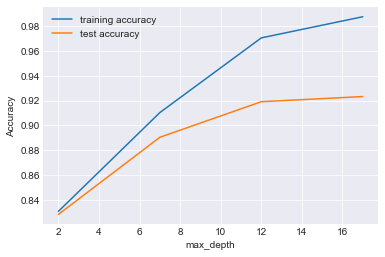

In [142]:
# Plotting accuracies with max_depth

plt.plot(RF_Scores["param_max_depth"], RF_Scores["mean_train_score"], label="training accuracy")
plt.plot(RF_Scores["param_max_depth"], RF_Scores["mean_test_score"], label = "test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [143]:
# Tuning n_estimators
# GridSearchCV to find optimal n_estimators

# Specify number of folds for k-fold CV

n_folds = 5

# Parameters to build the model on

parameters = {"n_estimators" : range(100, 1500, 400)}

# Instantiate the model (note we are specifying a max_depth)

Random_Forest_Model = RandomForestClassifier(max_depth = 10, class_weight = "balanced")

# fit tree on training data

Random_Forest_with_PCA = GridSearchCV(Random_Forest_Model, parameters, cv = n_folds, scoring = "accuracy", 
                                      n_jobs = -1, return_train_score = True)
Random_Forest_with_PCA.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [144]:
# Scores of GridSearch CV.

RF_Scores = Random_Forest_with_PCA.cv_results_
pd.DataFrame(RF_Scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      17.013579      0.416533         0.093218        0.004519   
1      85.228028      0.465175         0.573000        0.021088   
2     155.191561      2.873256         0.950418        0.084662   
3     201.751983     24.218910         1.093556        0.293075   

  param_n_estimators                  params  split0_test_score  \
0                100   {'n_estimators': 100}           0.912109   
1                500   {'n_estimators': 500}           0.910437   
2                900   {'n_estimators': 900}           0.911631   
3               1300  {'n_estimators': 1300}           0.912348   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.905183           0.912348           0.914020           0.912327   
1           0.906855           0.912109           0.916886           0.915194   
2           0.908765           0.912348           0.914736           0.917582   
3           0.908049           0.912825           0.916886           0.917582   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.911197        0.003085                4            0.951036   
1         0.912296        0.003537                3            0.952708   
2         0.913013        0.002975                2            0.952827   
3         0.913538        0.003453                1            0.952708   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.953007            0.953783            0.950737   
1            0.954320            0.952230            0.952469   
2            0.953783            0.953365            0.952529   
3            0.954320            0.951693            0.951514   

   split4_train_score  mean_train_score  std_train_score  
0            0.949367          0.951586         0.001599  
1            0.948352          0.952016         0.001973  
2            0.951158          0.952732         0.000898  
3            0.950621          0.952171         0.001263

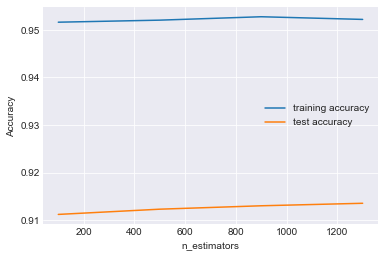

In [145]:
# plotting accuracies with n_estimators

plt.plot(RF_Scores["param_n_estimators"], RF_Scores["mean_train_score"], label = "training accuracy")
plt.plot(RF_Scores["param_n_estimators"], RF_Scores["mean_test_score"], label = "test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [146]:
# GridSearchCV to find optimal max_features

# specify number of folds for k-fold CV

n_folds = 5

# parameters to build the model on

parameters = {"max_features" : [4, 8, 14, 20, 24]}

# instantiate the model

Random_Forest_Model = RandomForestClassifier(max_depth = 10, class_weight = "balanced")

# fit tree on training data

Random_Forest_with_PCA = GridSearchCV(Random_Forest_Model, parameters, cv = n_folds, scoring = "accuracy", 
                                      n_jobs = -1, return_train_score = True)
Random_Forest_with_PCA.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [147]:
# Scores of GridSearch CV.

RF_Scores = Random_Forest_with_PCA.cv_results_
pd.DataFrame(RF_Scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.071629      0.156609         0.081231        0.006248   
1      13.590428      0.166667         0.081231        0.011690   
2      22.969720      0.178611         0.078106        0.013972   
3      32.258581      0.257760         0.081231        0.011690   
4      36.228194      3.225315         0.065610        0.018217   

  param_max_features                params  split0_test_score  \
0                  4   {'max_features': 4}           0.912348   
1                  8   {'max_features': 8}           0.909721   
2                 14  {'max_features': 14}           0.907571   
3                 20  {'max_features': 20}           0.911154   
4                 24  {'max_features': 24}           0.908288   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.905899           0.915691           0.916886           0.916388   
1           0.910198           0.914020           0.913781           0.917344   
2           0.905899           0.910915           0.918319           0.913282   
3           0.906616           0.909004           0.913303           0.911849   
4           0.902078           0.905899           0.909004           0.913282   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.913442        0.004091                1            0.954081   
1         0.913013        0.002797                2            0.951155   
2         0.911197        0.004390                3            0.949603   
3         0.910385        0.002339                4            0.947812   
4         0.907710        0.003689                5            0.946199   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.954081            0.952469            0.951872   
1            0.954738            0.952648            0.948767   
2            0.951155            0.948588            0.950439   
3            0.950678            0.949782            0.948289   
4            0.949961            0.948528            0.944527   

   split4_train_score  mean_train_score  std_train_score  
0            0.952890          0.953079         0.000880  
1            0.951994          0.951861         0.001949  
2            0.946143          0.949186         0.001746  
3            0.944770          0.948266         0.002027  
4            0.944650          0.946773         0.002151

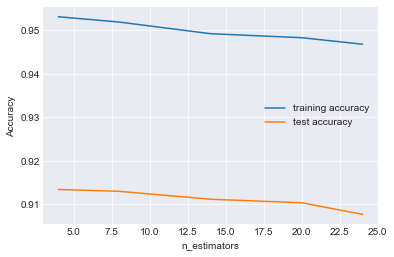

In [148]:
# plotting accuracies with n_estimators

plt.plot(RF_Scores["param_max_features"], RF_Scores["mean_train_score"], label = "training accuracy")
plt.plot(RF_Scores["param_max_features"], RF_Scores["mean_test_score"], label = "test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [149]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV

n_folds = 5

# parameters to build the model on

parameters = {"min_samples_leaf" : range(100, 400, 50)}

# Instantiate the model.

Random_Forest_Model = RandomForestClassifier(class_weight = "balanced")

# fit tree on training data

Random_Forest_with_PCA = GridSearchCV(Random_Forest_Model, parameters, cv = n_folds, scoring = "accuracy", 
                                      n_jobs = -1, return_train_score = True)
Random_Forest_with_PCA.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [150]:
# Scores of GridSearch CV.

RF_Scores = Random_Forest_with_PCA.cv_results_
pd.DataFrame(RF_Scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      12.249071      0.981313         0.078765        0.010952   
1      12.757216      0.054255         0.084593        0.008470   
2      11.409493      0.207973         0.094207        0.002785   
3      10.608314      0.069773         0.094127        0.006376   
4      10.093859      0.124824         0.070217        0.002315   
5       8.711657      1.466936         0.063556        0.014676   

  param_min_samples_leaf                     params  split0_test_score  \
0                    100  {'min_samples_leaf': 100}           0.871985   
1                    150  {'min_samples_leaf': 150}           0.863626   
2                    200  {'min_samples_leaf': 200}           0.845474   
3                    250  {'min_samples_leaf': 250}           0.844519   
4                    300  {'min_samples_leaf': 300}           0.831383   
5                    350  {'min_samples_leaf': 350}           0.836637   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.865297           0.869119           0.872462           0.876015   
1           0.857655           0.855505           0.859326           0.868371   
2           0.850251           0.841175           0.857893           0.858337   
3           0.845474           0.842369           0.849773           0.852126   
4           0.839264           0.836398           0.845713           0.845915   
5           0.836160           0.834010           0.837831           0.841137   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.870976        0.003587                1            0.886786   
1         0.860897        0.004590                2            0.871679   
2         0.850626        0.006757                3            0.854063   
3         0.846852        0.003572                4            0.849466   
4         0.839735        0.005568                5            0.840807   
5         0.837155        0.002344                6            0.845763   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.886308            0.884696            0.883263   
1            0.877889            0.868155            0.865588   
2            0.867320            0.856810            0.860214   
3            0.856691            0.853048            0.851496   
4            0.849704            0.849107            0.850600   
5            0.847256            0.842479            0.840031   

   split4_train_score  mean_train_score  std_train_score  
0            0.885001          0.885211         0.001248  
1            0.871806          0.871023         0.004146  
2            0.862013          0.860084         0.004540  
3            0.855326          0.853205         0.002591  
4            0.852520          0.848548         0.004039  
5            0.840041          0.843114         0.002951

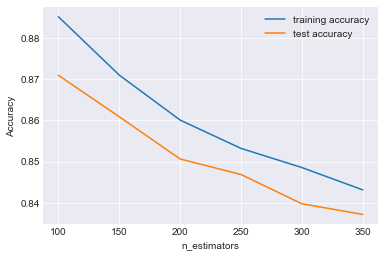

In [151]:
# plotting accuracies with n_estimators

plt.plot(RF_Scores["param_min_samples_leaf"], RF_Scores["mean_train_score"], label = "training accuracy")
plt.plot(RF_Scores["param_min_samples_leaf"], RF_Scores["mean_test_score"], label = "test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [152]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV

n_folds = 5

# parameters to build the model on

parameters = {"min_samples_split" : range(200, 500, 50)}

# Instantiate the model

Random_Forest_Model = RandomForestClassifier(class_weight = "balanced")

# fit tree on training data

Random_Forest_with_PCA = GridSearchCV(Random_Forest_Model, parameters, cv = n_folds, scoring = "accuracy",
                                     return_train_score = True)
Random_Forest_with_PCA.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [153]:
# Scores of GridSearch CV.

RF_Scores = Random_Forest_with_PCA.cv_results_
pd.DataFrame(RF_Scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.689702      0.054558         0.055556        0.001699   
1       8.431912      0.092839         0.053442        0.001173   
2       8.172781      0.089522         0.052253        0.000996   
3       8.053647      0.221945         0.050330        0.001234   
4       7.838490      0.129842         0.050274        0.001344   
5       7.643626      0.079957         0.049060        0.001698   

  param_min_samples_split                      params  split0_test_score  \
0                     200  {'min_samples_split': 200}           0.892524   
1                     250  {'min_samples_split': 250}           0.887987   
2                     300  {'min_samples_split': 300}           0.880344   
3                     350  {'min_samples_split': 350}           0.881538   
4                     400  {'min_samples_split': 400}           0.876284   
5                     450  {'min_samples_split': 450}           0.870074   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.890375           0.893002           0.901839           0.901099   
1           0.883210           0.882732           0.890614           0.893932   
2           0.879150           0.879389           0.885598           0.890349   
3           0.874851           0.874134           0.880822           0.884376   
4           0.871268           0.869835           0.872462           0.881510   
5           0.864581           0.861715           0.870791           0.874821   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.895768        0.004744                1            0.917537   
1         0.887695        0.004295                2            0.907566   
2         0.882966        0.004374                3            0.896817   
3         0.879144        0.003986                4            0.892697   
4         0.874272        0.004205                5            0.887920   
5         0.868396        0.004670                6            0.881830   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.918314            0.915985            0.917418   
1            0.907745            0.905774            0.903087   
2            0.902490            0.896399            0.897235   
3            0.894966            0.889114            0.889532   
4            0.891085            0.885114            0.883561   
5            0.885472            0.877829            0.875142   

   split4_train_score  mean_train_score  std_train_score  
0            0.918557          0.917562         0.000902  
1            0.907093          0.906253         0.001727  
2            0.899510          0.898490         0.002271  
3            0.892345          0.891731         0.002166  
4            0.887748          0.887086         0.002586  
5            0.881896          0.880434         0.003585

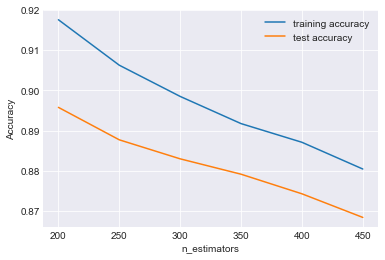

In [154]:
# plotting accuracies with n_estimators

plt.plot(RF_Scores["param_min_samples_split"], RF_Scores["mean_train_score"], label = "training accuracy")
plt.plot(RF_Scores["param_min_samples_split"], RF_Scores["mean_test_score"], label = "test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [155]:
# Create the parameter grid based on the results of random search.

param_grid = {"max_depth" : [8,10],
              "min_samples_leaf" : range(100, 200, 100),
              "min_samples_split" : range(200, 400, 100),
              "n_estimators" : range(200, 400, 100), 
              "max_features" : [8, 10, 12]}

# Create a based model

Random_Forest_Model = RandomForestClassifier(class_weight = "balanced")

# Instantiate the grid search model

Random_Forest_with_PCA = GridSearchCV(estimator = Random_Forest_Model, param_grid = param_grid,refit = "recall_score", 
                                      cv = 5, n_jobs = -1, verbose = 1, return_train_score = True)

In [156]:
# Fit the grid search to the data.

Random_Forest_with_PCA.fit(X_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 20.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs...,
                                              oob_score=False,
                                              r

In [157]:
# Get the optimal scores and hyperparameters.

print("We can achieve the acuuracy of ", Random_Forest_with_PCA.best_score_, "using", Random_Forest_with_PCA.best_params_)

We can achieve the acuuracy of  0.872981999776114 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [158]:
# model with the best hyperparameters

Random_Forest_Model = RandomForestClassifier(bootstrap = True, class_weight = "balanced", max_depth = 10, min_samples_leaf = 100, 
                             min_samples_split = 200, max_features = 8, n_estimators = 300)

# fit the model.

Random_Forest_Model.fit(X_train_pca, y_train)

# Predict on test data.

y_Pred_RF = Random_Forest_Model.predict(X_test_pca)

In [159]:
# Print some metrics after analysis.

print(classification_report(y_test, y_Pred_RF))
print(confusion_matrix(y_test, y_Pred_RF))
print("Accuracy Score : ", accuracy_score(y_test, y_Pred_RF))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8247
           1       0.36      0.73      0.48       725

    accuracy                           0.87      8972
   macro avg       0.67      0.81      0.70      8972
weighted avg       0.92      0.87      0.89      8972

[[7300  947]
 [ 199  526]]
Accuracy Score :  0.8722692822113242


In [160]:
# Confusion Matrix

Confusion_Matrix_RF = confusion_matrix(y_test, y_Pred_RF)
Confusion_Matrix_RF

array([[7300,  947],
       [ 199,  526]], dtype=int64)

In [161]:
TP = Confusion_Matrix_RF[1,1] # true positive 
TN = Confusion_Matrix_RF[0,0] # true negatives
FP = Confusion_Matrix_RF[0,1] # false positives
FN = Confusion_Matrix_RF[1,0] # false negatives

# Accuracy Score.
print("Accuracy Score on test data : ", accuracy_score(y_test, y_Pred_RF))

# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ", TP / float(TP + FN))

# Let us calculate specificity
print("Specificity : ", TN / float(TN + FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate : ", FP/ float(TN + FP))

# positive predictive value 
print("Positive Predictive Value : ", TP / float(TP + FP))

# Negative predictive value
print("Negative Predictive Value : ", TN / float(TN + FN))

# Misclassification rate
print("Misclassification Rate : ", (FN + FP)/(TP + TN + FP + FN))

# Precision 
print("Precision Socre : ", TP / float(TP + FP))

# Recall Score
print("Recall Score : ", TP / float(TP + FN))

Accuracy Score on test data :  0.8722692822113242
Sensitivity :  0.7255172413793104
Specificity :  0.8851703649812053
False Postive Rate :  0.11482963501879472
Positive Predictive Value :  0.35709436524100474
Negative Predictive Value :  0.9734631284171222
Misclassification Rate :  0.12773071778867587
Precision Socre :  0.35709436524100474
Recall Score :  0.7255172413793104


### 7.4. Logistic Regression Model with PCA. - (High Performance Model)

In [162]:
# Training the model on the train data.

Logistic_PCA = LogisticRegression(class_weight = "balanced")
Logistic_PCA_Model = Logistic_PCA.fit(X_train_pca,y_train)

In [163]:
Pred_Probs_Test = Logistic_PCA_Model.predict_proba(X_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, Pred_Probs_Test))

'0.89'

In [164]:
#Making prediction on the test data.

Test_Pred = Logistic_PCA_Model.predict_proba(X_test_pca)
y_pred_default = Logistic_PCA_Model.predict(X_test_pca)

In [165]:
# Get the confusion matrix.

print("Confusion Matrix : \n", confusion_matrix(y_test,y_pred_default))
print("Accuracy Score : ", accuracy_score(y_test,y_pred_default))

Confusion Matrix : 
 [[6751 1496]
 [ 119  606]]
Accuracy Score :  0.819995541685243


In [166]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(Test_Pred)

# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [167]:
# Removing index for both dataframes to append them side by side.

y_pred_1.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [168]:
# Appending y_test_df and y_pred_1
y_Pred_Final = pd.concat([y_test, y_pred_1], axis = 1)

# Renaming the column 
y_Pred_Final= y_Pred_Final.rename(columns = { 1 : 'Churn_Probability'})

### ROC Curve

In [169]:
# Function for ROC Curve.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize = (6, 6))
    plt.plot( fpr, tpr, label = "ROC curve (area = %0.2f)" % auc_score)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc = "lower right")
    plt.show()

    return fpr, tpr, thresholds

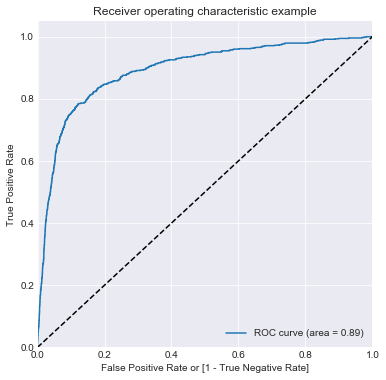

(array([0.        , 0.        , 0.        , ..., 0.99975749, 0.99987874,
        1.        ]),
 array([0.        , 0.00137931, 0.00275862, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99882029e+00, 9.98820287e-01, 9.98432987e-01, ...,
        3.59603691e-08, 2.87473530e-08, 1.57867548e-08]))

In [170]:
# Plot the ROC Curve to find area under curve.

draw_roc(y_Pred_Final.Churn, y_Pred_Final.Churn_Probability)

In [171]:
# Let's create columns for different probability cutoffs. 

Numbers = [float(x)/10 for x in range(10)]
for i in Numbers:
    y_Pred_Final[i]= y_Pred_Final.Churn_Probability.map(lambda x : 1 if x > i else 0)
y_Pred_Final

Churn  Churn_Probability  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0         0           0.001317    1    0    0    0    0    0    0    0    0   
1         0           0.280746    1    1    1    0    0    0    0    0    0   
2         1           0.152593    1    1    0    0    0    0    0    0    0   
3         0           0.013814    1    0    0    0    0    0    0    0    0   
4         0           0.000023    1    0    0    0    0    0    0    0    0   
...     ...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8967      0           0.281762    1    1    1    0    0    0    0    0    0   
8968      0           0.707700    1    1    1    1    1    1    1    1    0   
8969      0           0.175958    1    1    0    0    0    0    0    0    0   
8970      0           0.139594    1    1    0    0    0    0    0    0    0   
8971      0           0.205341    1    1    1    0    0    0    0    0    0   

      0.9  
0       0  
1       0  
2       0  
3       0  
4       0  
...   ...  
8967    0  
8968    0  
8969    0  
8970    0  
8971    0  

[8972 rows x 12 columns]

In [172]:
# For this probabilities calculate accuracy, specificity, sensitivity.

Probability_Cutoff_df = pd.DataFrame(columns = ["Probability", "Accuracy", "Sensitivity", "Specificity"])

prob_num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in prob_num:
    con_mat = metrics.confusion_matrix(y_Pred_Final.Churn, y_Pred_Final[i])
    total = sum(sum(con_mat))
    Accuracy = (con_mat[0, 0] + con_mat[1, 1]) / total
    Specificity = con_mat[0, 0] / (con_mat[0, 0] + con_mat[0, 1])
    Sensitivity = con_mat[1, 1] / (con_mat[1, 0] + con_mat[1, 1])
    Probability_Cutoff_df.loc[i] = [i, Accuracy, Specificity, Sensitivity]
Probability_Cutoff_df    

Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.080807     0.000000     1.000000
0.1          0.1  0.457423     0.413241     0.960000
0.2          0.2  0.592064     0.562023     0.933793
0.3          0.3  0.683125     0.663635     0.904828
0.4          0.4  0.760366     0.750818     0.868966
0.5          0.5  0.819996     0.818601     0.835862
0.6          0.6  0.868257     0.875591     0.784828
0.7          0.7  0.903589     0.920335     0.713103
0.8          0.8  0.921422     0.952831     0.564138
0.9          0.9  0.925435     0.983145     0.268966

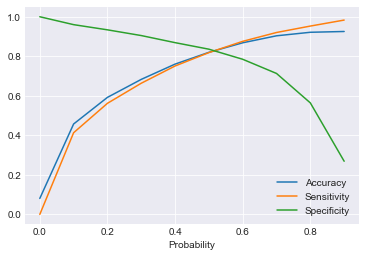

In [173]:
# Plot a graph for probabilities of Accuracy, Sensitivity, Specificity.

Probability_Cutoff_df.plot.line(x = "Probability", y = ["Accuracy", "Sensitivity", "Specificity"])
plt.show()

In [174]:
# Function for Finding the optimal cutoff.

def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])

In [175]:
# Find optimal probability cutoff.

Cutoff = Find_Optimal_Cutoff(y_Pred_Final.Churn,y_Pred_Final.Churn_Probability)
print("Threshold : ", Cutoff)

Threshold :  [0.513729077722451]


In [176]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.51 else 0
# Creating dataframe after selecting good cutoff of 0.51.

y_Pred_Final["Predicted_Churn"] = y_Pred_Final.Churn_Probability.map(lambda x : 1 if x > 0.51 else 0)
y_Pred_Final

Churn  Churn_Probability  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0         0           0.001317    1    0    0    0    0    0    0    0    0   
1         0           0.280746    1    1    1    0    0    0    0    0    0   
2         1           0.152593    1    1    0    0    0    0    0    0    0   
3         0           0.013814    1    0    0    0    0    0    0    0    0   
4         0           0.000023    1    0    0    0    0    0    0    0    0   
...     ...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8967      0           0.281762    1    1    1    0    0    0    0    0    0   
8968      0           0.707700    1    1    1    1    1    1    1    1    0   
8969      0           0.175958    1    1    0    0    0    0    0    0    0   
8970      0           0.139594    1    1    0    0    0    0    0    0    0   
8971      0           0.205341    1    1    1    0    0    0    0    0    0   

      0.9  Predicted_Churn  
0       0                0  
1       0                0  
2       0                0  
3       0                0  
4       0                0  
...   ...              ...  
8967    0                0  
8968    0                1  
8969    0                0  
8970    0                0  
8971    0                0  

[8972 rows x 13 columns]

In [177]:
# Get Confusion matrix.

Confusion_Mat = metrics.confusion_matrix(y_Pred_Final.Churn, y_Pred_Final.Predicted_Churn)
Confusion_Mat

array([[6789, 1458],
       [ 124,  601]], dtype=int64)

In [178]:
TP = Confusion_Mat[1,1] # true positive 
TN = Confusion_Mat[0,0] # true negatives
FP = Confusion_Mat[0,1] # false positives
FN = Confusion_Mat[1,0] # false negatives

# Accuracy Score.
print("Accuracy Score on test data : ", accuracy_score(y_test, y_pred_default))

# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ", TP / float(TP + FN))

# Let us calculate specificity
print("Specificity : ", TN / float(TN + FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate : ", FP/ float(TN + FP))

# positive predictive value 
print("Positive Predictive Value : ", TP / float(TP + FP))

# Negative predictive value
print("Negative Predictive Value : ", TN / float(TN + FN))

# Misclassification rate
print("Misclassification Rate : ", (FN+FP)/(TP+TN+FP+FN))

# Precision 
print("Precision Socre : ", TP / float(TP + FP))

# Recall Score
print("Recall Score : ", TP / float(TP + FN))

Accuracy Score on test data :  0.819995541685243
Sensitivity :  0.8289655172413793
Specificity :  0.8232084394325209
False Postive Rate :  0.17679156056747908
Positive Predictive Value :  0.2918892666342885
Negative Predictive Value :  0.9820627802690582
Misclassification Rate :  0.176326348640214
Precision Socre :  0.2918892666342885
Recall Score :  0.8289655172413793


### 7.5. Logistic Regression Model without PCA - (Interpretable Model)

In [179]:
Logistic_Reg = LogisticRegression(class_weight = "balanced")

rfe = RFE(Logistic_Reg, 15) 
rfe = rfe.fit(X_train, y_train)

print(rfe.support_)         
print(rfe.ranking_) 

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False  True False False
  True False False  True False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False  True  True False False False False False
  True False False  True False False  True False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False  True False False False False  True  True False
 False False False False False False False False Fa

In [180]:
col = X_train.columns[rfe.support_]
col

Index(['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'max_rech_data_8', 'sep_vbc_3g', 'loc_og_to_ic_mou_8',
       'Total_loc_mou_7', 'Total_loc_mou_8'],
      dtype='object')

In [181]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif["Features"] = X_train[col].columns
vif["VIF"] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3         loc_ic_mou_8  54.19
1     loc_ic_t2m_mou_8  26.47
14     Total_loc_mou_8  17.23
0     loc_ic_t2t_mou_8   9.52
13     Total_loc_mou_7   7.61
6     total_rech_num_8   6.71
5     total_rech_num_7   5.76
7       max_rech_amt_8   3.93
8   last_day_rch_amt_8   2.73
12  loc_og_to_ic_mou_8   2.73
2     loc_ic_t2f_mou_8   2.05
10     max_rech_data_8   1.96
9    total_rech_data_8   1.70
4         spl_ic_mou_8   1.09
11          sep_vbc_3g   1.09

In [182]:
# Let's run the model using the selected variables

Log_Reg = LogisticRegression(class_weight = "balanced")
Log_Reg.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [183]:
# Get the ROC_AUC Score.

Pred_Prob_Test = Log_Reg.predict_proba(X_test[col])[:, 1]
"{:2.2}".format(metrics.roc_auc_score(y_test, Pred_Prob_Test))

'0.88'

In [184]:
# Making prediction on the test data

Pred_Test = Log_Reg.predict_proba(X_test[col])
y_pred_default = Log_Reg.predict(X_test[col])

In [185]:
# Converting y_pred to a dataframe which is an array

y_Pred = pd.DataFrame(Pred_Test)

# Converting to column dataframe

y_Pred = y_Pred.iloc[:, [1]]

In [186]:
# Removing index for both dataframes to append them side by side 

y_Pred.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [187]:
# Appending y_test and y_Pred

y_Pred_Final = pd.concat([y_test, y_Pred], axis = 1)

# Renaming the column 

y_Pred_Final= y_Pred_Final.rename(columns = { 1 : "Churn_Probability"})

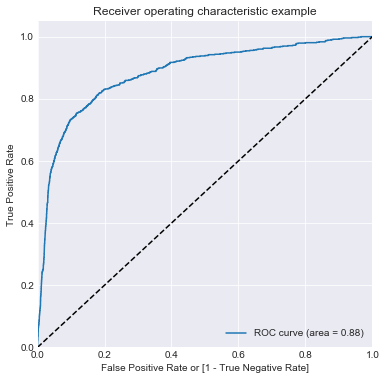

(array([0.        , 0.        , 0.        , ..., 0.99975749, 0.99987874,
        1.        ]),
 array([0.        , 0.00137931, 0.00275862, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99264760e+00, 9.92647597e-01, 9.92210878e-01, ...,
        1.99547913e-08, 1.19059283e-08, 5.43870388e-09]))

In [188]:
draw_roc(y_Pred_Final.Churn, y_Pred_Final.Churn_Probability)

In [189]:
# To find cutoff we need to create some columns with different probability cutoff.

probability_numbers = [float(x) / 10 for x in range(10)]
for i in probability_numbers:
    y_Pred_Final[i] = y_Pred_Final.Churn_Probability.map(lambda x : 1 if x > i else 0)
y_Pred_Final

Churn  Churn_Probability  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0         0           0.001640    1    0    0    0    0    0    0    0    0   
1         0           0.317410    1    1    1    1    0    0    0    0    0   
2         1           0.011579    1    0    0    0    0    0    0    0    0   
3         0           0.006145    1    0    0    0    0    0    0    0    0   
4         0           0.000003    1    0    0    0    0    0    0    0    0   
...     ...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8967      0           0.148219    1    1    0    0    0    0    0    0    0   
8968      0           0.606385    1    1    1    1    1    1    1    0    0   
8969      0           0.529807    1    1    1    1    1    1    0    0    0   
8970      0           0.089046    1    0    0    0    0    0    0    0    0   
8971      0           0.090478    1    0    0    0    0    0    0    0    0   

      0.9  
0       0  
1       0  
2       0  
3       0  
4       0  
...   ...  
8967    0  
8968    0  
8969    0  
8970    0  
8971    0  

[8972 rows x 12 columns]

In [190]:
# For this probabilities calculate accuracy, specificity, sensitivity.

Probability_Cutoff_df = pd.DataFrame(columns = ["Probability", "Accuracy", "Sensitivity", "Specificity"])

prob_num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in prob_num:
    con_mat = metrics.confusion_matrix(y_Pred_Final.Churn, y_Pred_Final[i])
    total = sum(sum(con_mat))
    Accuracy = (con_mat[0, 0] + con_mat[1, 1]) / total
    Specificity = con_mat[0, 0] / (con_mat[0, 0] + con_mat[0, 1])
    Sensitivity = con_mat[1, 1] / (con_mat[1, 0] + con_mat[1, 1])
    Probability_Cutoff_df.loc[i] = [i, Accuracy, Specificity, Sensitivity]
Probability_Cutoff_df    

Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.080807     0.000000     1.000000
0.1          0.1  0.410722     0.362799     0.955862
0.2          0.2  0.542243     0.507457     0.937931
0.3          0.3  0.637985     0.614284     0.907586
0.4          0.4  0.718792     0.705711     0.867586
0.5          0.5  0.791351     0.787680     0.833103
0.6          0.6  0.851538     0.858615     0.771034
0.7          0.7  0.900245     0.918516     0.692414
0.8          0.8  0.927664     0.959015     0.571034
0.9          0.9  0.923094     0.991148     0.148966

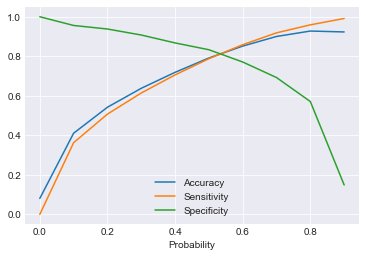

In [191]:
# Plot a graph for probabilities of Accuracy, Sensitivity, Specificity.

Probability_Cutoff_df.plot.line(x = "Probability", y = ["Accuracy", "Sensitivity", "Specificity"])
plt.show()

In [192]:
# Find optimal probability cutoff

Cutoff = Find_Optimal_Cutoff(y_Pred_Final.Churn,y_Pred_Final.Churn_Probability)
print("CutOff threshold : ", Cutoff)

CutOff threshold :  [0.5370223341255324]


In [193]:
# Creating dataframe after selecting good cutoff of 0.36.

y_Pred_Final["Predicted_Churn"] = y_Pred_Final.Churn_Probability.map(lambda x : 1 if x > 0.53 else 0)
y_Pred_Final

Churn  Churn_Probability  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0         0           0.001640    1    0    0    0    0    0    0    0    0   
1         0           0.317410    1    1    1    1    0    0    0    0    0   
2         1           0.011579    1    0    0    0    0    0    0    0    0   
3         0           0.006145    1    0    0    0    0    0    0    0    0   
4         0           0.000003    1    0    0    0    0    0    0    0    0   
...     ...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8967      0           0.148219    1    1    0    0    0    0    0    0    0   
8968      0           0.606385    1    1    1    1    1    1    1    0    0   
8969      0           0.529807    1    1    1    1    1    1    0    0    0   
8970      0           0.089046    1    0    0    0    0    0    0    0    0   
8971      0           0.090478    1    0    0    0    0    0    0    0    0   

      0.9  Predicted_Churn  
0       0                0  
1       0                0  
2       0                0  
3       0                0  
4       0                0  
...   ...              ...  
8967    0                0  
8968    0                1  
8969    0                0  
8970    0                0  
8971    0                0  

[8972 rows x 13 columns]

In [194]:
# Get Confusion matrix.

Confusion_Mat = metrics.confusion_matrix(y_Pred_Final.Churn, y_Pred_Final.Predicted_Churn)
Confusion_Mat

array([[6693, 1554],
       [ 131,  594]], dtype=int64)

In [195]:
TP = Confusion_Mat[1,1] # true positive 
TN = Confusion_Mat[0,0] # true negatives
FP = Confusion_Mat[0,1] # false positives
FN = Confusion_Mat[1,0] # false negatives

# Accuracy Score.
print("Accuracy Score on test data : ", accuracy_score(y_test, y_pred_default))

# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ", TP / float(TP + FN))

# Let us calculate specificity
print("Specificity : ", TN / float(TN + FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Postive Rate : ", FP/ float(TN + FP))

# positive predictive value 
print("Positive Predictive Value : ", TP / float(TP + FP))

# Negative predictive value
print("Negative Predictive Value : ", TN / float(TN + FN))

# Misclassification rate
print("Misclassification Rate : ", (FN+FP)/(TP+TN+FP+FN))

# Precision 
print("Precision Socre : ", TP / float(TP + FP))

# Recall Score
print("Recall Score : ", TP / float(TP + FN))

Accuracy Score on test data :  0.7913508693713777
Sensitivity :  0.8193103448275862
Specificity :  0.8115678428519462
False Postive Rate :  0.18843215714805384
Positive Predictive Value :  0.276536312849162
Negative Predictive Value :  0.9808030480656507
Misclassification Rate :  0.18780650913954525
Precision Socre :  0.276536312849162
Recall Score :  0.8193103448275862


## Step 8 : Conclusion.

### 8.1. Necessary metrics evaluation for all models.

| Model/Metrics                                         | Final Test Score |
|-------------------------------------------------------|------------------|
| **Decision Tree with PCA**                            |                  |
| Accuracy                                              |       80.89%     |
| Sensitivity/Recall                                    |       69.24%     |
| Specificity                                           |       81.92%     |
| Precision                                             |       25.18%     |
| False Positive Rate                                   |       18.07%     |
|                                                       |                  |
| **Random Forest with PCA**                            |                  |
| Accuracy                                              |       87.29%     |
| Sensitivity/Recall                                    |       72.41%     |
| Specificity                                           |       88.60%     |
| Precision                                             |       35.83%     |
| False Positive Rate                                   |       11.39%     |
|                                                       |                  |
| **Logistic Regression with PCA**                      |                  |
| Accuracy                                              |       81.99%     |
| Sensitivity/Recall                                    |       82.89%     |
| Specificity                                           |       82.32%     |
| Precision                                             |       29.18%     |
| False Positive Rate                                   |       17.69%     |
|                                                       |                  |
| **Logistic Regression without PCA**                   |                  |
| Accuracy                                              |       79.13%     |
| Sensitivity/Recall                                    |       81.93%     |
| Specificity                                           |       81.15%     |
| Precision                                             |       27.65%     |
| False Positive Rate                                   |       18.84%     |

- From above observation we can observe that all high performace model works better than interpretable model.
- In high performance model Logistic Model and Random Forest Model perform better than Decision Tree Model.
- All over the Random Forest model works best.

### 8.2. Feature Importance.

##### 1. Decision Tree - High Performance Model.

In [196]:
# Get the important Variables for Decision Tree model.

Feature_Names = list(X_train.columns.values)
Important_Features_Dict = {}
for Name, Importance in zip(Feature_Names, Opt_Tree.feature_importances_):
    Important_Features_Dict[Name] = Importance
Des_Dict = OrderedDict(sorted(Important_Features_Dict.items(), key = lambda kv : kv[1], reverse = True))

In [197]:
# Get the variable importance top 10 variables in Decision Tree Model.

Feature_Dictionary = dict(Des_Dict)
def Get_Features(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))
n = 10
Decision_Tree_Imp_Features = Get_Features(n, Feature_Dictionary.items())

In [198]:
Decision_Tree_Imp_Features

[('offnet_mou_6', 0.31151634490662344),
 ('arpu_7', 0.19543711960661667),
 ('onnet_mou_7', 0.06076473320892586),
 ('loc_og_t2t_mou_6', 0.057538673204231776),
 ('std_og_mou_8', 0.028316081715296447),
 ('loc_og_mou_8', 0.024324269286973444),
 ('onnet_mou_6', 0.02065035752099003),
 ('std_ic_t2t_mou_8', 0.01739748839449601),
 ('offnet_mou_7', 0.013452384902346856),
 ('arpu_8', 0.0125177832990529)]

##### 2. Random Forest - High Performace Model.

In [199]:
# Get the important Variables for Random Forest model.

Feature_Names = list(X_train.columns.values)
Important_Features_Dict = {}
for Name, Importance in zip(Feature_Names, Random_Forest_Model.feature_importances_):
    Important_Features_Dict[Name] = Importance
Des_Dict_2 = OrderedDict(sorted(Important_Features_Dict.items(), key = lambda kv : kv[1], reverse = True))

In [200]:
# Get the variable importance top 10 variables in Random Forest Model.

Feature_Dictionary = dict(Des_Dict_2)
def Get_Features(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))
n = 10
Random_Forest_Imp_Features = Get_Features(n, Feature_Dictionary.items())

In [201]:
Random_Forest_Imp_Features

[('offnet_mou_6', 0.2233969164790154),
 ('arpu_7', 0.15674153072602293),
 ('onnet_mou_7', 0.06059997351817967),
 ('loc_og_t2t_mou_6', 0.04522033379392611),
 ('roam_ic_mou_7', 0.03876499953849128),
 ('offnet_mou_7', 0.03652274829480625),
 ('loc_og_mou_8', 0.02980531457426468),
 ('onnet_mou_6', 0.02683088143224675),
 ('arpu_6', 0.024693400503775838),
 ('std_og_t2t_mou_8', 0.021952249932812407)]

##### 3. Logistic Model without PCA - Interpretable Model.

In [202]:
X_train[col]

loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0              0.000000          0.000000          0.000000      0.000000   
1              0.002609          0.454471          0.000979      0.307716   
2              0.305159          0.143519          0.023321      0.230852   
3              0.025016          0.066931          0.007284      0.056810   
4              0.298564          0.046157          0.000000      0.159415   
...                 ...               ...               ...           ...   
20929          0.107844          0.027617          0.000000      0.064960   
20930          0.249332          0.059139          0.000000      0.147015   
20931          0.242770          0.172135          0.017015      0.222545   
20932          0.000000          0.064952          0.000000      0.043799   
20933          0.444917          0.176357          0.027616      0.313582   

       spl_ic_mou_8  total_rech_num_7  total_rech_num_8  max_rech_amt_8  \
0          0.000000          0.191489          0.088889        0.000000   
1          0.000000          0.148936          0.022222        0.136698   
2          0.000000          0.063830          0.155556        0.264984   
3          0.000000          0.340426          0.155556        0.105152   
4          0.388889          0.808511          0.666667        0.070452   
...             ...               ...               ...             ...   
20929      0.000000          0.276596          0.355556        0.026288   
20930      0.000000          0.212766          0.133333        0.052576   
20931      0.000000          0.170213          0.111111        0.262881   
20932      0.000000          0.425532          0.288889        0.038906   
20933      0.000000          0.148936          0.066667        0.136698   

       last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  sep_vbc_3g  \
0                0.000000           0.000000         0.000000    0.000000   
1                0.230088           0.000000         0.000000    0.000000   
2                0.230088           0.076923         0.553846    0.000000   
3                0.053097           0.000000         0.000000    0.021218   
4                0.107965           0.307692         0.123077    0.000000   
...                   ...                ...              ...         ...   
20929            0.044248           0.461538         0.054945    0.000000   
20930            0.088496           0.000000         0.000000    0.000000   
20931            0.442478           0.000000         0.000000    0.000000   
20932            0.044248           0.230769         0.054945    0.190866   
20933            0.230088           0.153846         0.334066    0.020231   

       loc_og_to_ic_mou_8  Total_loc_mou_7  Total_loc_mou_8  
0                0.000000         0.050462         0.000000  
1                0.008596         0.804884         0.185407  
2                0.124394         0.249718         0.294591  
3                0.070986         0.043745         0.055061  
4                0.060208         0.118029         0.143988  
...                   ...              ...              ...  
20929            0.077066         0.086932         0.065234  
20930            0.061815         0.412647         0.134184  
20931            0.065504         0.128539         0.207770  
20932            0.003093         0.021252         0.025000  
20933            0.091346         0.401663         0.339753  

[20934 rows x 15 columns]

In [203]:
Log_Reg.coef_

array([[-2.75012429, -4.76198221, -2.08883458, -2.98221992, -3.34070919,
         2.10333898, -3.56933488,  1.74758685, -2.82369775, -2.53331075,
        -2.27221364, -6.32265708, -2.73595222,  3.54018442, -3.40035831]])

sep_vbc_3g            6.32
loc_ic_t2m_mou_8      4.76
total_rech_num_8      3.56
Total_loc_mou_7       3.54
Total_loc_mou_8       3.40
spl_ic_mou_8          3.34
loc_ic_mou_8          2.98
last_day_rch_amt_8    2.82
loc_ic_t2t_mou_8      2.75
loc_og_to_ic_mou_8    2.73
total_rech_data_8     2.53
max_rech_data_8       2.27
total_rech_num_7      2.10
loc_ic_t2f_mou_8      2.08
max_rech_amt_8        1.74

### Important features of all models as per coefficients.

##### <font color = "blue">1. Decision Tree Model
- offnet_mou_6
- arpu_7
- onnet_mou_7
- loc_og_t2t_mou_6
- std_og_mou_8
- loc_og_mou_8
- onnet_mou_6
- std_ic_t2t_mou_8
- offnet_mou_7
- arpu_8

##### <font color = "blue">2. Random Forest Model
- offnet_mou_6
- arpu_7
- onnet_mou_7
- roam_ic_mou_7
- loc_og_t2t_mou_6
- offnet_mou_7
- loc_og_mou_8
- arpu_6
- onnet_mou_6
- std_og_t2t_mou_8

##### <font color = "blue">3. Logisitic Model - Interpretable Model
- sep_vbc_3g 
- loc_ic_t2m_mou_8   
- total_rech_num_8   
- Total_loc_mou_7    
- Total_loc_mou_8    
- spl_ic_mou_8       
- loc_ic_mou_8       
- last_day_rch_amt_8 
- loc_ic_t2t_mou_8   
- loc_og_to_ic_mou_8
- total_rech_num_7	
- max_rech_amt_8	
- max_rech_data_8	
- total_rech_data_8	

### 8.3. Bussiness Recommendation for company based on Interpreatble model important features. 

It is a fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal.

**1. Improving Incoming / Outgoing services.**
- Initially, churner's outgoing usage was more than that of non-churners. Gradually they dropped there outgoing usage. May be these customers din't like the outgoing services offered to them or may be the call tariffs seemed expensive to them or may be the overall call quality and same for the incoming call, network signal was not liked my them.

- The Network operators must futher investigate their outgoing tariffs, plans and campaigns.
- Might be that the outgoing tariffs offered to it's customer are less competitive to the outgoing tariffs of their competitor.
- New campaigns which targets the customers with high outgoing usage be rolled out.Like, 
    - Discounted outgoing rates during particular hours of the day for these customers.
    - For every X mou, grant customer with some % of X free mou.
    - Free monthly outgoing mou's depending on the users past roaming mou usage.
  
**2. Improving Roaming services.**
- Churners show higher roaming usage than non-churners.
- The Network operators must futher investigate their roaming tariffs, and quality of service.
- Might be that the roaming tariffs offered are less competitive than their competitor.
- It might be that the customer is not getting good quality of service while roaming. In this case, quality of service guarantees with roaming partners and network quality need to be investigated.
- New campaigns which targets the roaming customers can be rolled out. Like, 
    - Discounted roaming rates during particular hours of the day.
    - Free monthly roaming mou's depending on the users past roaming mou usage.
  
**3. Monitoring Drop in usage.**
- Customer churn seems to be well predicted by drop in usage. 
- Aside from using the Machine Learning model for predicting churn, the telecom company should pay close attention to drop in MoU, ARPU and data usage (2g and 3g) month over month. If feasible, the company should track these numbers week over week. Since billing cycles are typically monthly, a drop in usage numbers will give the company time to react when tracked at weekly level. 
- Contact these customers proactively to find out what's affecting their experience. Perhaps, offer them coupons or other incentives to continue to use the services, while the company fixes the issues reported. 
- Marketing team must come up with campaigns which targets these high-value to-be churner.
- Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.

**4. The company** needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.


**Final Conclusion :-** 
- From the above we can clearly infer that calls related incoming & outgoing within a circle is key for identifying churn customers
- Especially the usage during the action pahse when compared to good month (7th month) has reduced
- The other key factor is if the recharge amount shows a dip in the action phase is sign of churn
- Age on network is also a key indicator for identifying the churn, if aon is less than 500 days and their usage is reduce then the customer is going to be churned
- The usage of mobile data has also reduced when compared with 7th month. So, data usage & amount can also be the other features for understanding the churn behavior
- ARPU 7th and 8th - Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.
- last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.
- max_rech_amt_8- Focus on the customer whoes Avg max recharge amount has been decreased
- max_rech_data_8- Focus on the customer whoes Avg max data recharge has been decreased